## **Walmart - Confidence Interval and CLT**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### **Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### **Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:


User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Walmart/walmart_data.csv")
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

'User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status' have categorical values.So we need to change the datatype from int and object to category.

In [ ]:
col = ['User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status']
df[col] = df[col].astype('category')

In [ ]:
df.describe()

Occupation  Product_Category       Purchase
count  550068.000000     550068.000000  550068.000000
mean        8.076707          5.404270    9263.968713
std         6.522660          3.936211    5023.065394
min         0.000000          1.000000      12.000000
25%         2.000000          1.000000    5823.000000
50%         7.000000          5.000000    8047.000000
75%        14.000000          8.000000   12054.000000
max        20.000000         20.000000   23961.000000

In [ ]:
df.describe().T

count         mean          std   min     25%     50%  \
Occupation        550068.0     8.076707     6.522660   0.0     2.0     7.0   
Product_Category  550068.0     5.404270     3.936211   1.0     1.0     5.0   
Purchase          550068.0  9263.968713  5023.065394  12.0  5823.0  8047.0   

                      75%      max  
Occupation           14.0     20.0  
Product_Category      8.0     20.0  
Purchase          12054.0  23961.0

In [ ]:
df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

In [ ]:
df.describe(include=['object','category']).T

count unique        top    freq
User_ID                     550068   5891    1001680    1026
Product_ID                  550068   3631  P00265242    1880
Gender                      550068      2          M  414259
Age                         550068      7      26-35  219587
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821
Marital_Status              550068      2          0  324731



*   There are 5891 unique users and also USER ID: 1001680 is the most frequent.
*   There are 3631 unique products available and most Top purchased product is ID:P002652.
*   The top age group which visit the store are in between 26-35 age group.
*   Men are the most buyers than women.
*   Accoridng to above analysis most of them are unmarried.
*   There are 3 cities according to data and the most buyers are from city B.







**Univariate Analysis**

In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
df['Product_ID'].nunique()

3631

In [ ]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

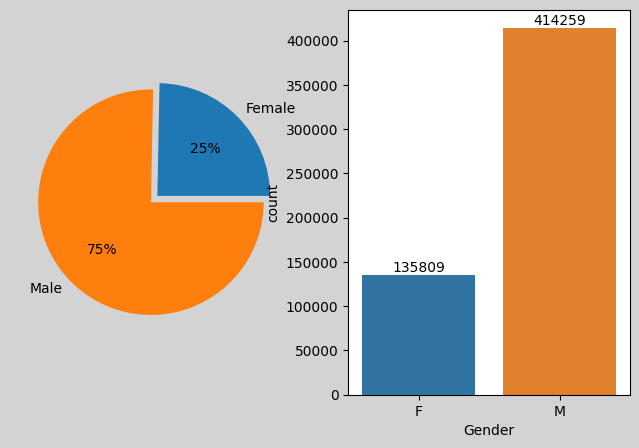

In [ ]:
plt.figure(figsize = (8,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
labels = ['Female','Male']
plt.pie(df.groupby('Gender')['Gender'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Gender')
for i in label.containers:
    label.bar_label(i)

plt.show()

Out of this analysis 75% are men and 25% are women.


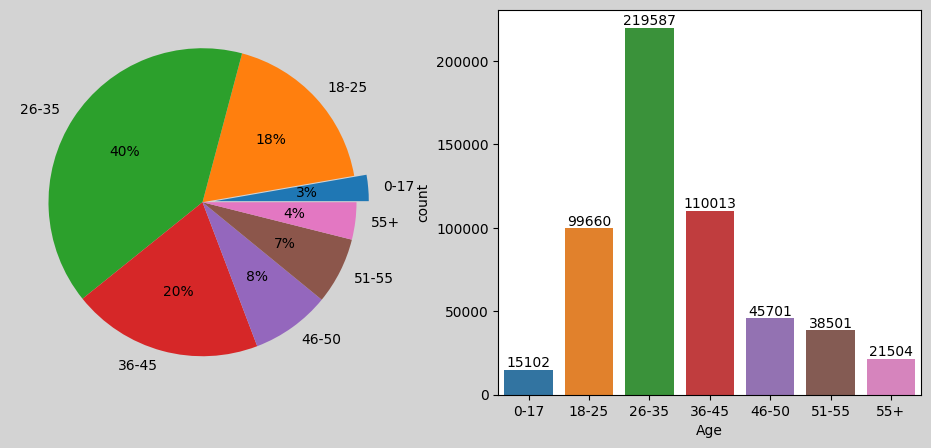

In [ ]:
plt.figure(figsize = (12,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
labels = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.pie(df.groupby('Age')['Age'].count(), labels = labels, explode = (0.08,0,0,0,0,0,0), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Age')
for i in label.containers:
    label.bar_label(i)

plt.show()

*   The most percentile of the buyers are fall under the age group of 26-35 and there 219587 buyers approximately 40%.
*   The least percentile is 3% and buyers buyers are from 0-17 age group.
*   We can observe that most buyers are in within the age of 18-45 before and after this range we can see less buyers.


In [ ]:
df['City_Category'].unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

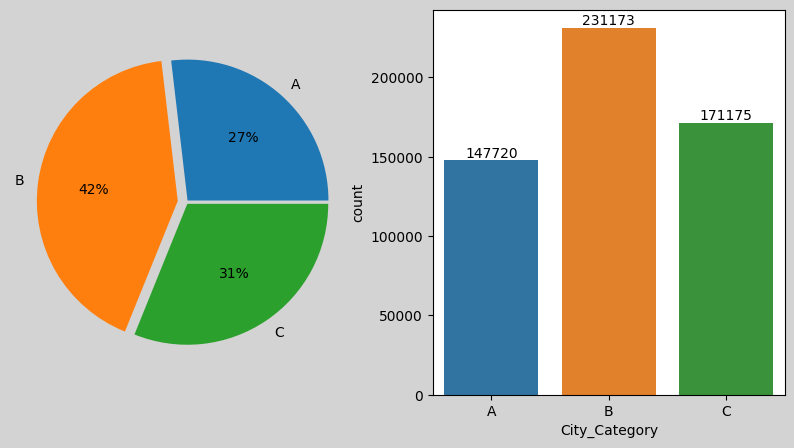

In [ ]:
plt.figure(figsize = (10,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
labels = ['A','B','C']
plt.pie(df.groupby('City_Category')['City_Category'].count(), labels = labels, explode = (0.015,0.06,0.015), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='City_Category')
for i in label.containers:
    label.bar_label(i)

plt.show()

*   As we know most buyers are from city having the 42% while to C-31% and A-27% is the least.


In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

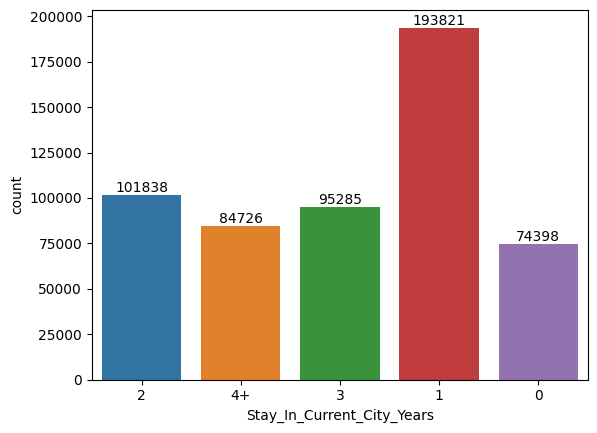

In [ ]:
label = sns.countplot(data = df, x='Stay_In_Current_City_Years')
for i in label.containers:
    label.bar_label(i)

In [ ]:
df['Marital_Status'].unique()

[0, 1]
Categories (2, int64): [0, 1]



*   On the Marital status there are 2 values 0 and 1.
*   0 means unmarried and 1 means married.

let's change this from 0 and 1 to unmarried and married.



In [ ]:
df['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
df['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

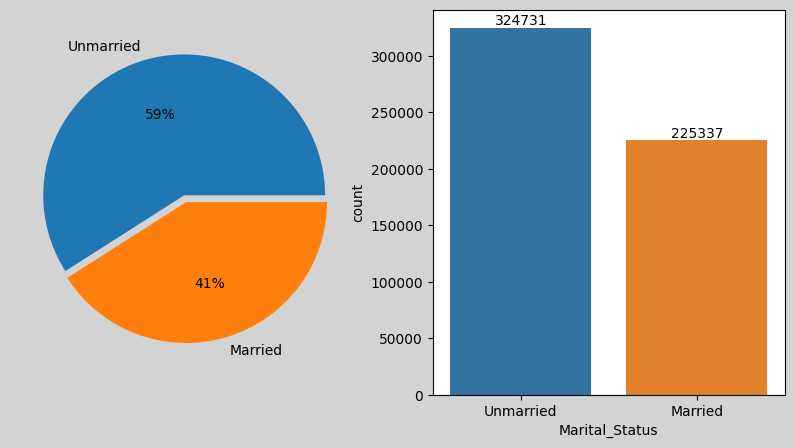

In [ ]:
plt.figure(figsize = (10,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
labels = ['Unmarried','Married']
plt.pie(df.groupby('Marital_Status')['Marital_Status'].count(), labels = labels, explode = (0.05,0), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Marital_Status')
for i in label.containers:
    label.bar_label(i)

plt.show()

We can observe that 59% of the frequent buyers are of unmarried people, while 41% of married.

In [ ]:
round(df['Purchase'].describe(),2)

count    550068.00
mean       9263.97
std        5023.07
min          12.00
25%        5823.00
50%        8047.00
75%       12054.00
max       23961.00
Name: Purchase, dtype: float64

*   The average order value is 9263.97
*   While 50% of the buyers spend an approximate of 8047.
*   The lowest order value is as low as 12.
*   While, the highest order value is of 23961.


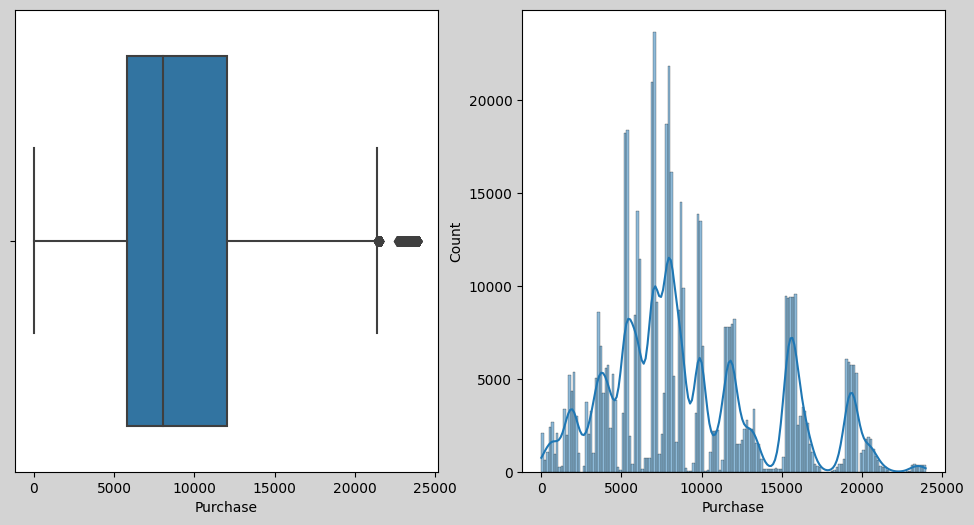

In [ ]:
plt.figure(figsize=(12, 6)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Purchase', orient='h')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

While observing the purchase values of the orders we can infer that

Most of the values lies between 6000 and 12000.

Most order values lies in the range of 5000 - 10000

There are more orders in the range 15000 - 16000 followed by 11000 - 11500 range and a few also in the 19000 - 20000 range.

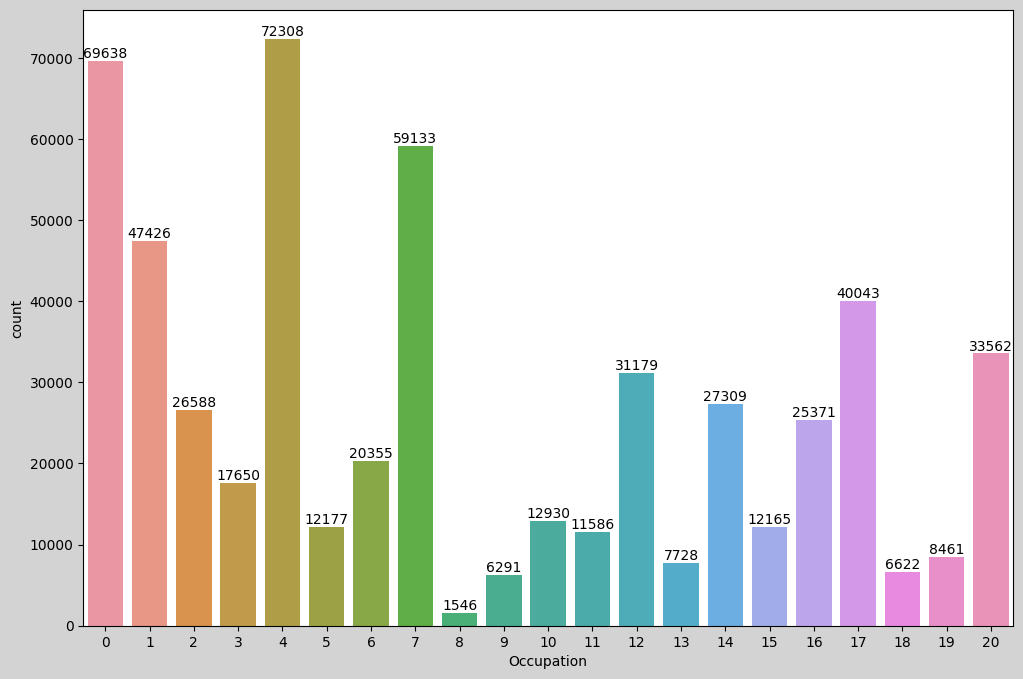

In [ ]:
plt.figure(figsize=(12, 8)).set_facecolor("lightgrey")
label = sns.countplot(data = df, x='Occupation')
for i in label.containers:
    label.bar_label(i)

*   People having occupation 4 are the most frequent buyers followed by occupation 0 and 7.
*   People having occupation 8 are the least frequent buyers followed by occupation 9 and 18.

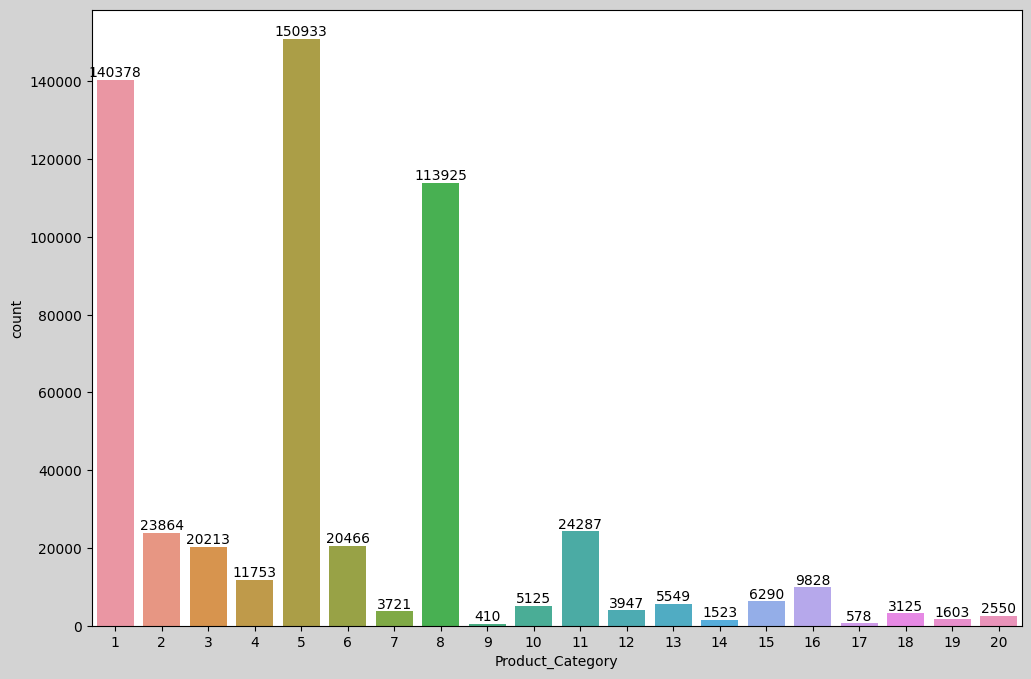

In [ ]:
plt.figure(figsize=(12, 8)).set_facecolor("lightgrey")
label = sns.countplot(data = df, x='Product_Category')
for i in label.containers:
    label.bar_label(i)

*   The most frequent bought product category is 5 followed by 1 and 8.
*   All the other categories are not much touched.
*   The least frequent bought are category 9 followed by 17 and 14.


**Bivariate Analysis**

Lets observe gender while purchase habits.

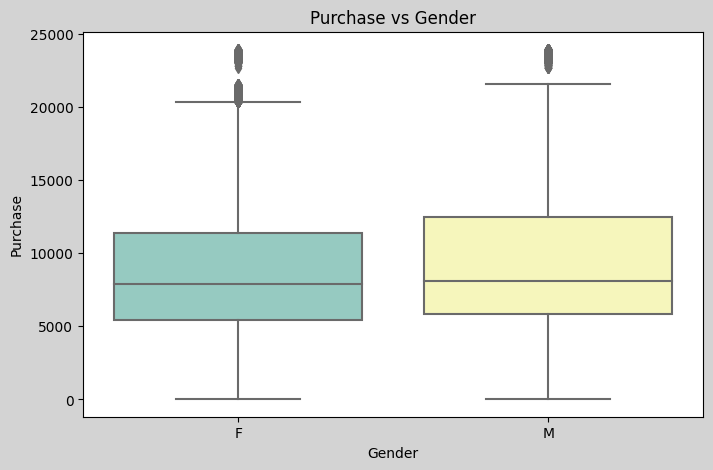

In [ ]:
plt.figure(figsize = (8,5)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Gender', palette = 'Set3')
plt.title('Purchase vs Gender')
plt.show()

*   We can observe Males spend more than Females.


In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

The average order value for a male is 9437.

While for a female it is 8734.

Most of the purchases for men is around 8098 and for females it is around 7914.

Now, lets see the Purchase VS age group wise.

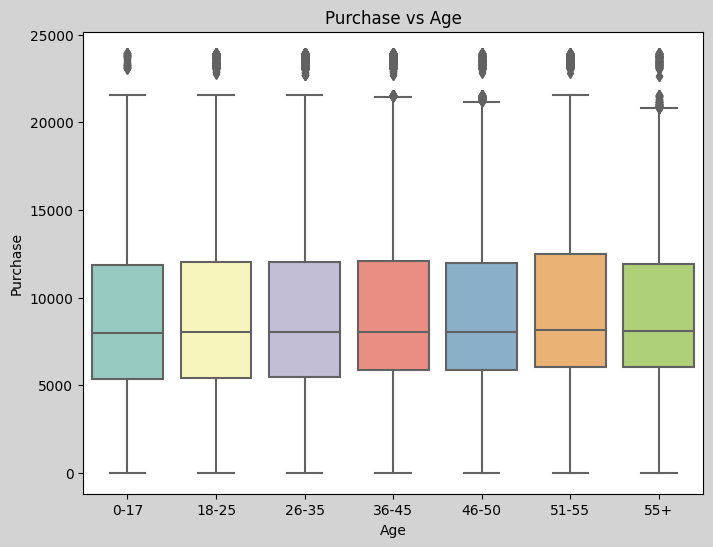

In [ ]:
plt.figure(figsize = (8,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Age', palette = 'Set3')
plt.title('Purchase vs Age')
plt.show()

*   We can not see much difference in the median purchase values for different age groups

In [ ]:
df.groupby(['Age'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

*   The average order value is highest for age group 51-55 which is around 9534.
*   While, the average amount is lowest for age group 0-17 which is arouns 8933.
*   The highest order value for all the groups is around 23960.
*   The losest order value is 12 for all the groups.

Lets see purchase habits according to Occupation

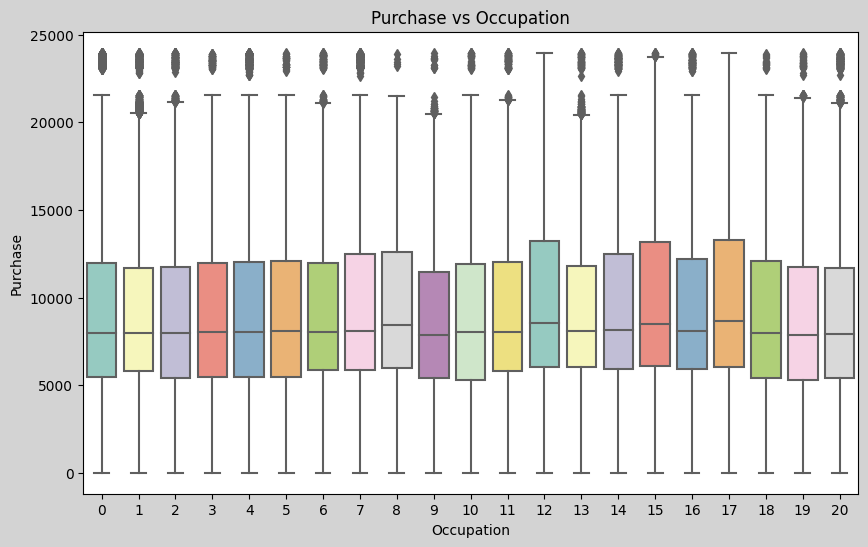

In [ ]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Occupation', palette = 'Set3')
plt.title('Purchase vs Occupation')
plt.show()

*   There are many outliers in the data.
*   We can not see much difference in the median values.

In [ ]:
df.groupby(['Occupation'])['Purchase'].describe()

count         mean          std   min      25%     50%  \
Occupation                                                             
0           69638.0  9124.428588  4971.757402  12.0  5445.00  8001.0   
1           47426.0  8953.193270  4838.482159  12.0  5825.00  7966.0   
2           26588.0  8952.481683  4939.418663  12.0  5419.00  7952.0   
3           17650.0  9178.593088  5000.942719  12.0  5478.00  8008.0   
4           72308.0  9213.980251  5043.674855  12.0  5441.75  8043.0   
5           12177.0  9333.149298  5025.616603  12.0  5452.00  8080.0   
6           20355.0  9256.535691  4989.216005  12.0  5888.00  8050.0   
7           59133.0  9425.728223  5086.097089  12.0  5878.00  8069.0   
8            1546.0  9532.592497  4916.641374  14.0  5961.75  8419.5   
9            6291.0  8637.743761  4653.290986  13.0  5403.00  7886.0   
10          12930.0  8959.355375  5124.339999  12.0  5326.25  8012.5   
11          11586.0  9213.845848  5103.802992  12.0  5835.75  8041.5   
12          31179.0  9796.640239  5140.437446  12.0  6054.00  8569.0   
13           7728.0  9306.351061  4940.156591  12.0  6038.00  8090.5   
14          27309.0  9500.702772  5069.600234  12.0  5922.00  8122.0   
15          12165.0  9778.891163  5088.424301  12.0  6109.00  8513.0   
16          25371.0  9394.464349  4995.918117  12.0  5917.00  8070.0   
17          40043.0  9821.478236  5137.024383  12.0  6012.00  8635.0   
18           6622.0  9169.655844  4987.697451  12.0  5420.00  7955.0   
19           8461.0  8710.627231  5024.181000  12.0  5292.00  7840.0   
20          33562.0  8836.494905  4919.662409  12.0  5389.00  7903.5   

                 75%      max  
Occupation                     
0           11957.00  23961.0  
1           11702.75  23960.0  
2           11718.00  23955.0  
3           11961.00  23914.0  
4           12034.00  23961.0  
5           12091.00  23924.0  
6           11971.50  23951.0  
7           12486.00  23948.0  
8           12607.00  23869.0  
9           11436.00  23943.0  
10          11931.75  23955.0  
11          12010.00  23946.0  
12          13239.00  23960.0  
13          11798.50  23959.0  
14          12508.00  23941.0  
15          13150.00  23949.0  
16          12218.50  23947.0  
17          13292.50  23961.0  
18          12062.75  23894.0  
19          11745.00  23939.0  
20          11677.00  23960.0

*   But, here we can observe that the highest median value is for occupation 17
*   The lowest median value is for occupation 19.
*   Occupation 17 have the high average order values compared to other occupations which is 9821.
*   Occupation 9 have the lowest average order value which is 8637.

Now, lets see city wise purchase habits.

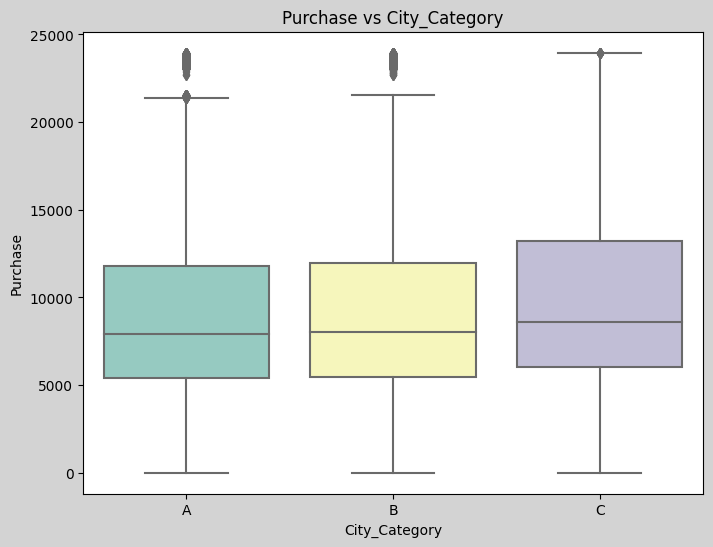

In [ ]:
plt.figure(figsize = (8,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'City_Category', palette = 'Set3')
plt.title('Purchase vs City_Category')
plt.show()

*   City Category c has the highest median value followed by city B and city A.
*   There are a few outliers fro city A and B.


In [ ]:
df.groupby(['City_Category'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
City_Category                                                             
A              147720.0  8911.939216  4892.115238  12.0  5403.0  7931.0   
B              231173.0  9151.300563  4955.496566  12.0  5460.0  8005.0   
C              171175.0  9719.920993  5189.465121  12.0  6031.5  8585.0   

                   75%      max  
City_Category                    
A              11786.0  23961.0  
B              11986.0  23960.0  
C              13197.0  23961.0

*   We can also observe that the mean value for a order is highest for city C followed by B and A.


Lets see if stay years of a person in a city affects his/her purchase habits or not.

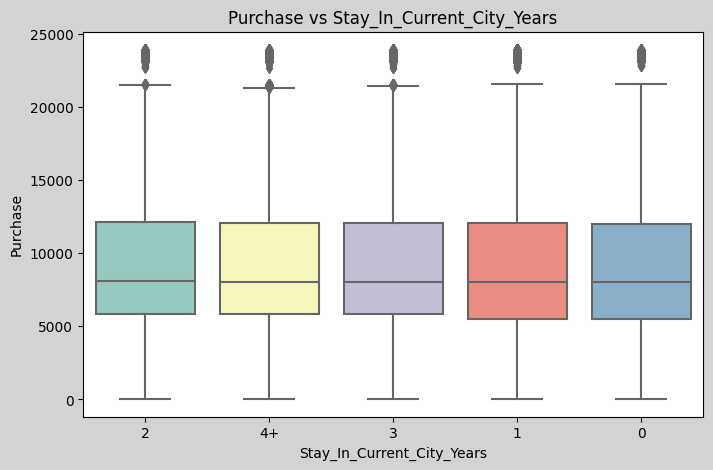

In [ ]:
plt.figure(figsize = (8,5)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Stay_In_Current_City_Years', palette = 'Set3')
plt.title('Purchase vs Stay_In_Current_City_Years')
plt.show()

We can see that the median value is almost the same for all the years.

In [ ]:
df.groupby(['Stay_In_Current_City_Years'])['Purchase'].describe()

count         mean          std   min     25%  \
Stay_In_Current_City_Years                                                     
0                            74398.0  9180.075123  4990.479940  12.0  5480.0   
1                           193821.0  9250.145923  5027.476933  12.0  5500.0   
2                           101838.0  9320.429810  5044.588224  12.0  5846.0   
3                            95285.0  9286.904119  5020.343541  12.0  5832.0   
4+                           84726.0  9275.598872  5017.627594  12.0  5844.0   

                               50%      75%      max  
Stay_In_Current_City_Years                            
0                           8025.0  11990.0  23960.0  
1                           8041.0  12042.0  23961.0  
2                           8072.0  12117.0  23961.0  
3                           8047.0  12075.0  23961.0  
4+                          8052.0  12038.0  23958.0

*   We can also see that the average order value is also almost the same which lies in the range of 9180 to 9286.
*   One more thing we can observe here is that the highest order value is also the same for all the years.

Lets see if Marital Status affects the spending habits of a person



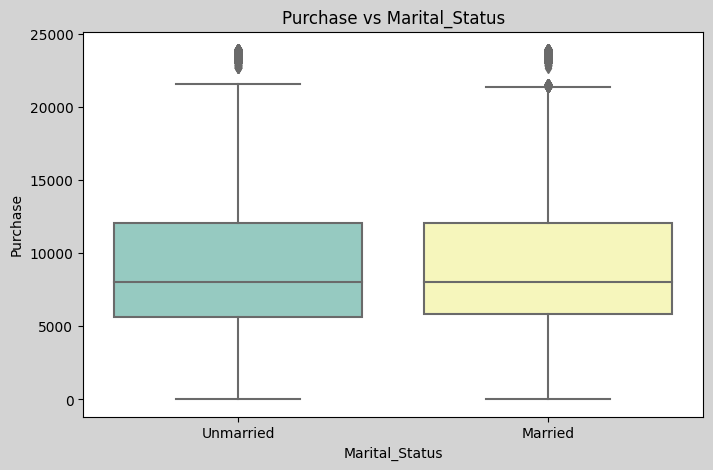

In [ ]:
plt.figure(figsize = (8,5)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Marital_Status', palette = 'Set3')
plt.title('Purchase vs Marital_Status')
plt.show()

*   We can observe that the median value is almost the same.

Lets check the minimum, maximum and average order value.


In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
Unmarried       324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
Married         225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
Unmarried       12061.0  23961.0  
Married         12042.0  23961.0

*   The minimum and maximum order value is same for both types of people.
*   We can observe that the average is also almost the same for both.

Lets see on which product category people spend more or less.

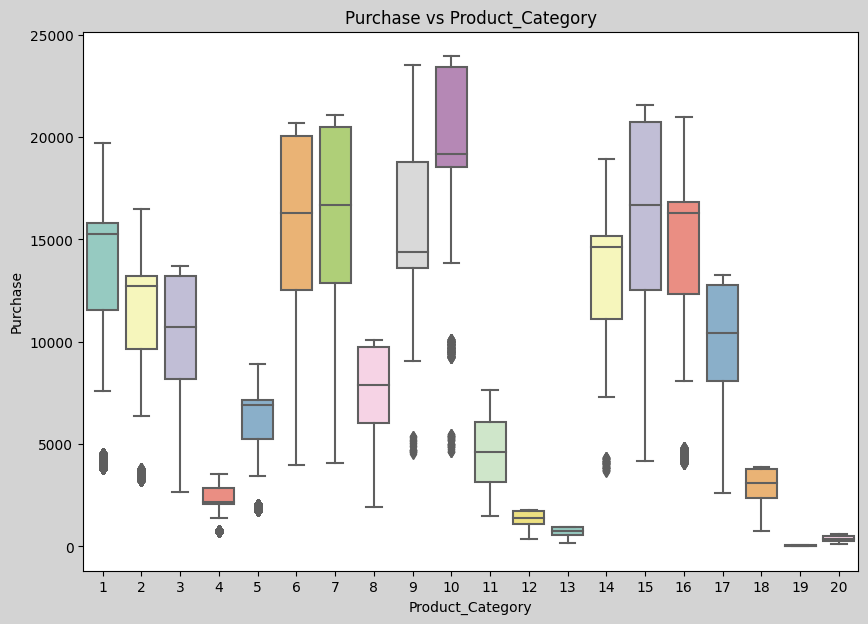

In [ ]:
plt.figure(figsize = (10,7)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Product_Category', palette = 'Set3')
plt.title('Purchase vs Product_Category')
plt.show()

We can clearly observe hige differences in the median values for all the product categories.

In [ ]:
df.groupby(['Product_Category'])['Purchase'].describe()

count          mean          std     min       25%  \
Product_Category                                                          
1                 140378.0  13606.218596  4298.834894  3790.0  11546.00   
2                  23864.0  11251.935384  3570.642713  3176.0   9645.75   
3                  20213.0  10096.705734  2824.626957  2638.0   8198.00   
4                  11753.0   2329.659491   812.540292   684.0   2058.00   
5                 150933.0   6240.088178  1909.091687  1713.0   5242.00   
6                  20466.0  15838.478550  4011.233690  3981.0  12505.00   
7                   3721.0  16365.689600  4174.554105  4061.0  12848.00   
8                 113925.0   7498.958078  2013.015062  1939.0   6036.00   
9                    410.0  15537.375610  5330.847116  4528.0  13583.50   
10                  5125.0  19675.570927  4225.721898  4624.0  18546.00   
11                 24287.0   4685.268456  1834.901184  1472.0   3131.00   
12                  3947.0   1350.859894   362.510258   342.0   1071.00   
13                  5549.0    722.400613   183.493126   185.0    578.00   
14                  1523.0  13141.625739  4069.009293  3657.0  11097.00   
15                  6290.0  14780.451828  5175.465852  4148.0  12523.25   
16                  9828.0  14766.037037  4360.213198  4036.0  12354.00   
17                   578.0  10170.759516  2333.993073  2616.0   8063.50   
18                  3125.0   2972.864320   727.051652   754.0   2359.00   
19                  1603.0     37.041797    16.869148    12.0     24.00   
20                  2550.0    370.481176   167.116975   118.0    242.00   

                      50%       75%      max  
Product_Category                              
1                 15245.0  15812.00  19708.0  
2                 12728.5  13212.00  16504.0  
3                 10742.0  13211.00  13717.0  
4                  2175.0   2837.00   3556.0  
5                  6912.0   7156.00   8907.0  
6                 16312.0  20051.00  20690.0  
7                 16700.0  20486.00  21080.0  
8                  7905.0   9722.00  10082.0  
9                 14388.5  18764.00  23531.0  
10                19197.0  23438.00  23961.0  
11                 4611.0   6058.00   7654.0  
12                 1401.0   1723.00   1778.0  
13                  755.0    927.00    962.0  
14                14654.0  15176.50  18931.0  
15                16660.0  20745.75  21569.0  
16                16292.5  16831.00  20971.0  
17                10435.5  12776.75  13264.0  
18                 3071.0   3769.00   3900.0  
19                   37.0     50.00     62.0  
20                  368.0    490.00    613.0

*   The median value for product category 10 is the highest which is 19197.
*   The median value for product category 19 is the lowest which is only 37
*   The average order value for category 10 is the highest which is 19675.
*   The average order value for category 19 is also the lowest which is 37.
*   Clearly, category 19 is the least preferred or least frequent bought product category.

# **Multi-variate Analysis**

Lets see Male vs Female Purchase habits age wise.

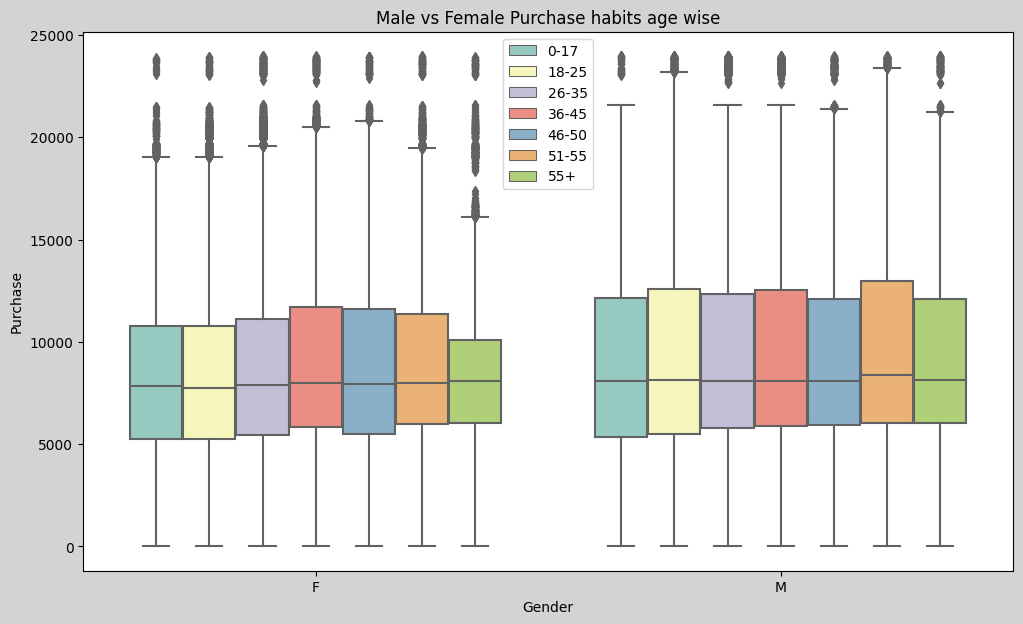

In [ ]:
plt.figure(figsize = (12,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Purchase habits age wise')

plt.show()

*   The median values for 18-25 age females is the lowest and almost same for the rest.
*   The median values for all age categories is almost the same and is highest for 51-55 age group.

Lets see Male vs Female City wise purchase habits.


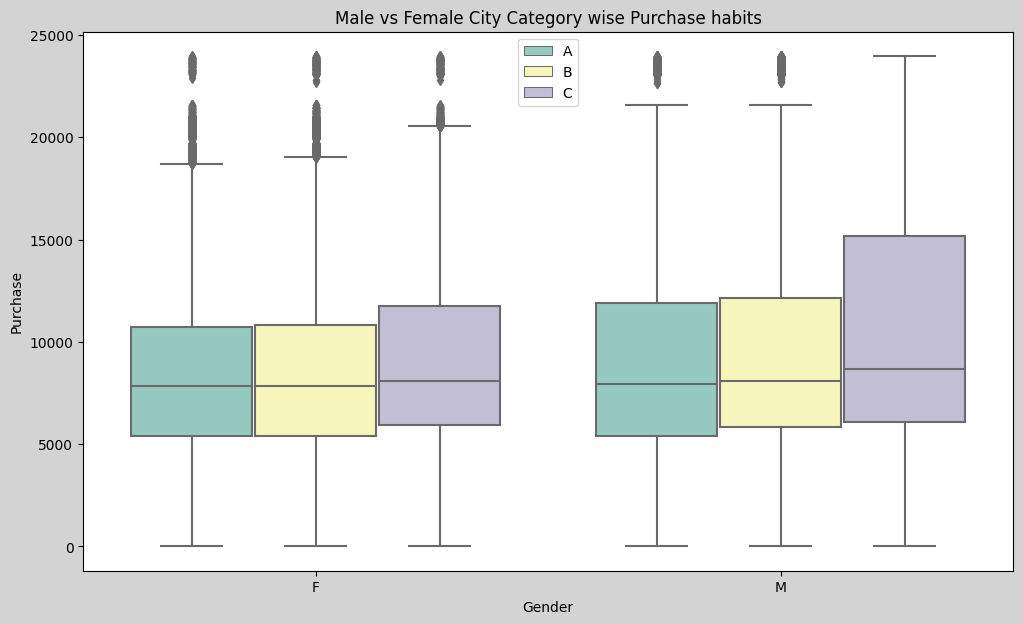

In [ ]:
plt.figure(figsize = (12,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3')
plt.legend(loc=9)
plt.title("Male vs Female City Category wise Purchase habits")
plt.show()

*   We can observe for females the median values for purchase amount is a little lower for women staying for 3 and 0 years as compared to others.
*   For men, there is no much difference.


Lets check the Correlation in the numerical values of the dataset.



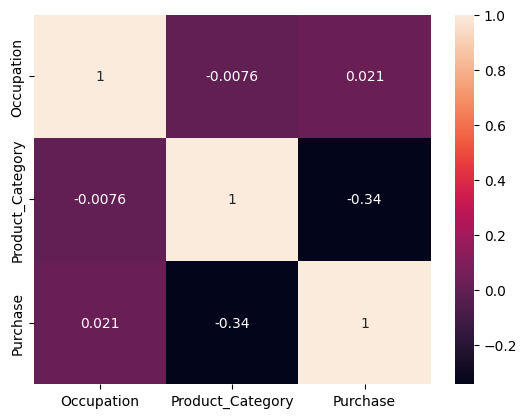

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

*   High Negative Correlation(-0.0076) between Product Category and Occupation.
*   Slight Positive Correlation(0.021) between Purchase and Occupation.
*   Negative Correlation(-0.34) between Product Category and Purchase.

Lets plot the pairplot and see relations between the columns



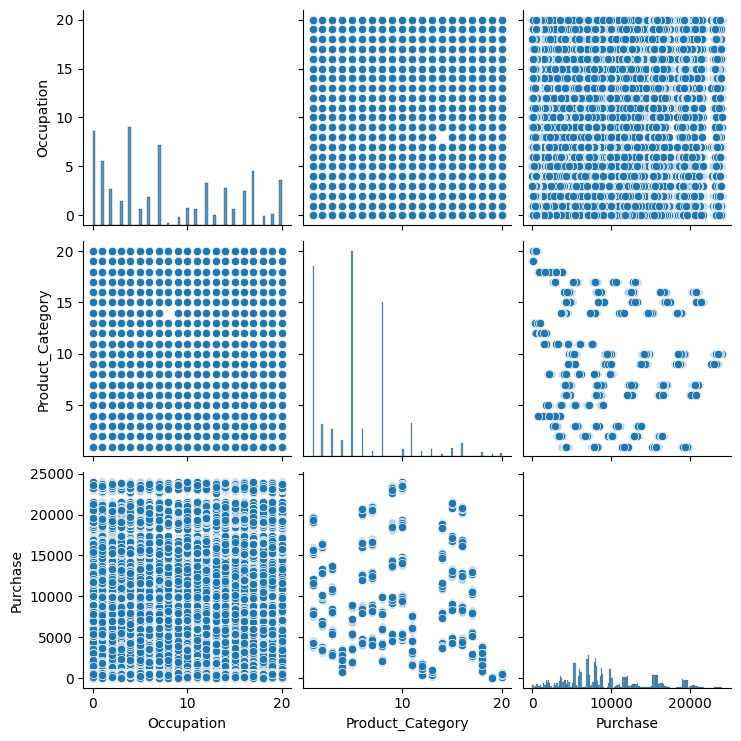

In [ ]:
sns.pairplot(df)
plt.show()

# **Central LIMIT Theroem**

In [ ]:
def bootstrap(sample1,sample2,sample_size,itr_size=1000,ci=90):
    ci = ci/100

    plt.figure(figsize=(16,8))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # For Sample1's means
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    # For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2

    sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

    sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)

    plt.title(f"Sample Size: {sample_size}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)}, Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')


    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)


In [ ]:
df_male = df[df['Gender']=='M']
df_female = df[df['Gender']=='F']

# **Male Vs Female Purchase Values**

<Figure size 1000x600 with 0 Axes>

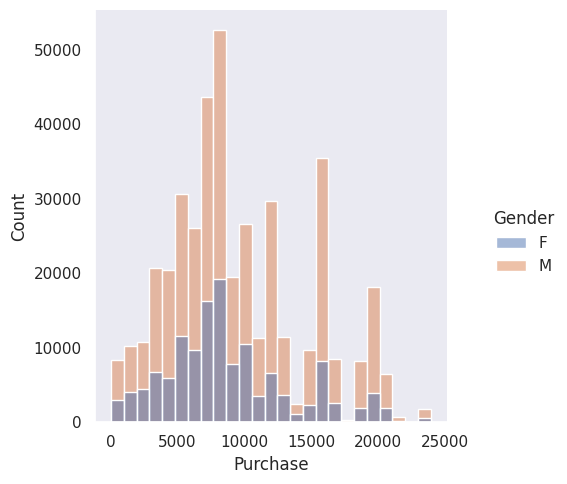

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style='dark')
sns.displot(x= 'Purchase',data=df,hue='Gender',bins=25)
plt.show()

We can observe that Male spend more than Female.

In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

Lets plot the mean of 1000 Random Samples of sizes 10,100,1000,10000 and 100000 with 90% Confidence Interval

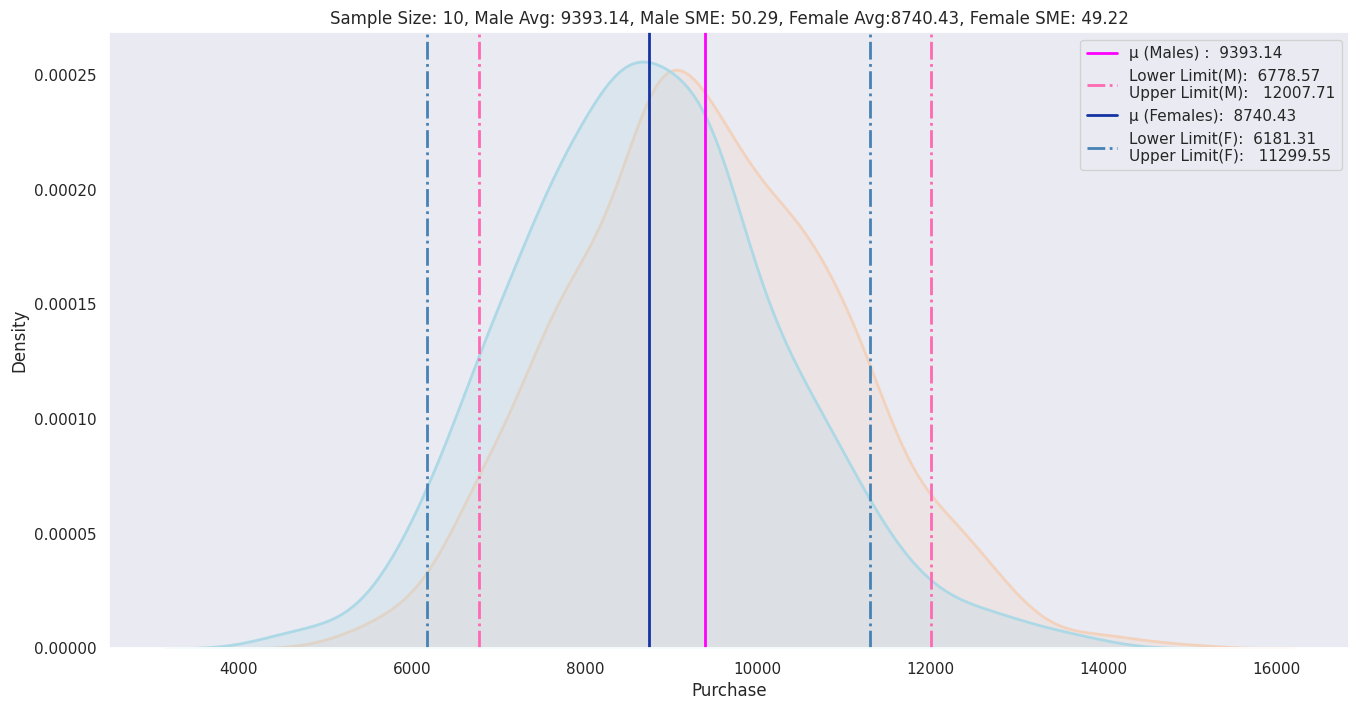

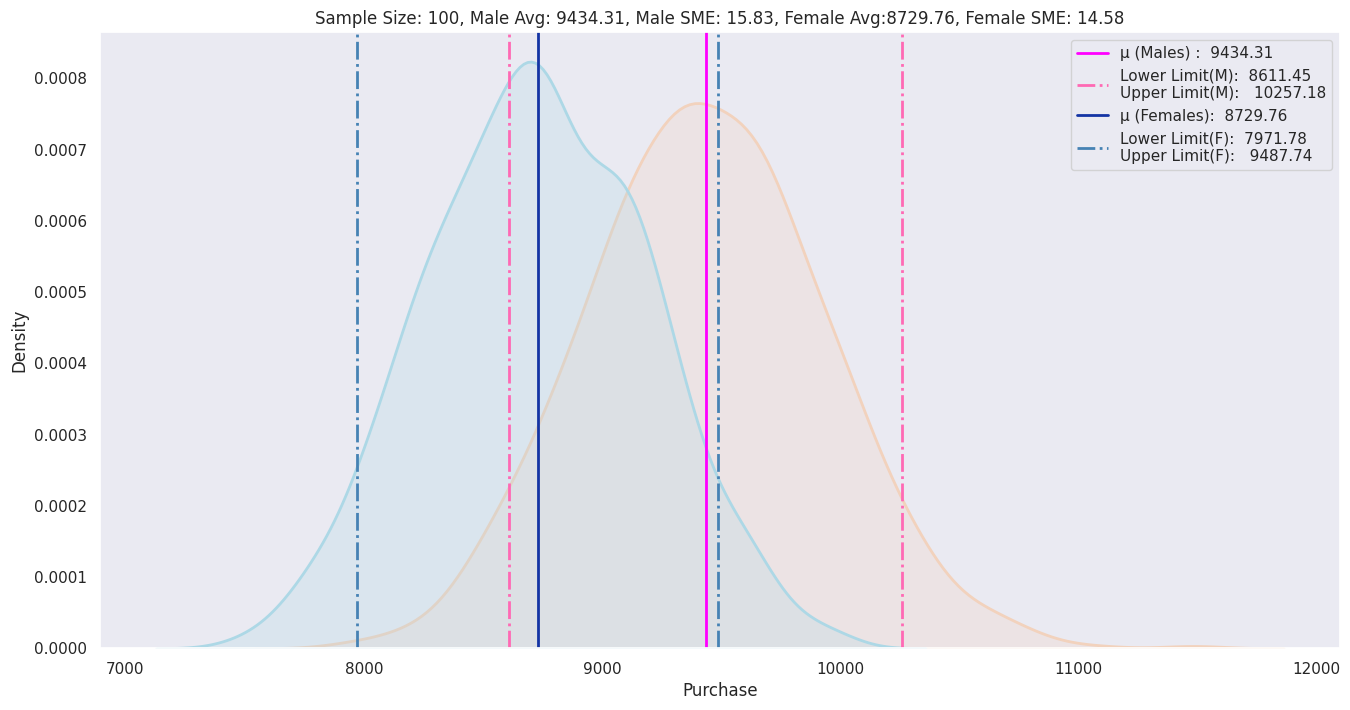

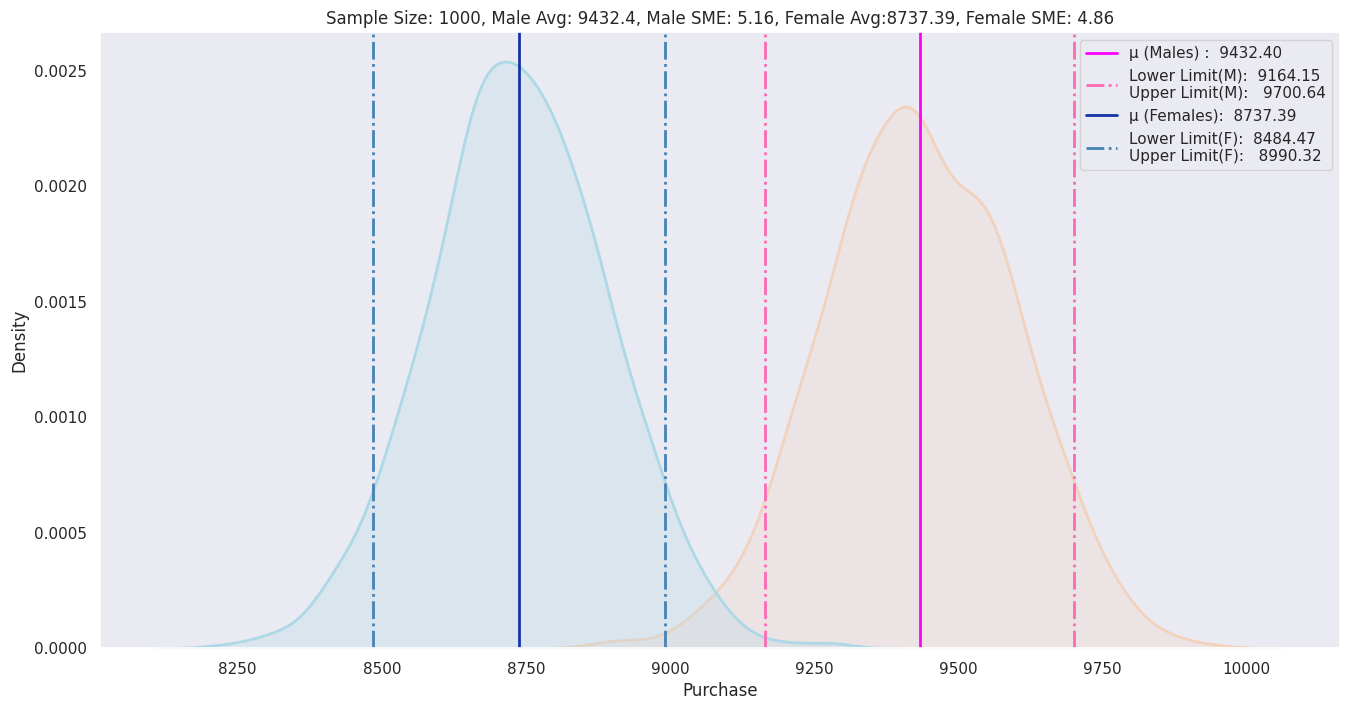

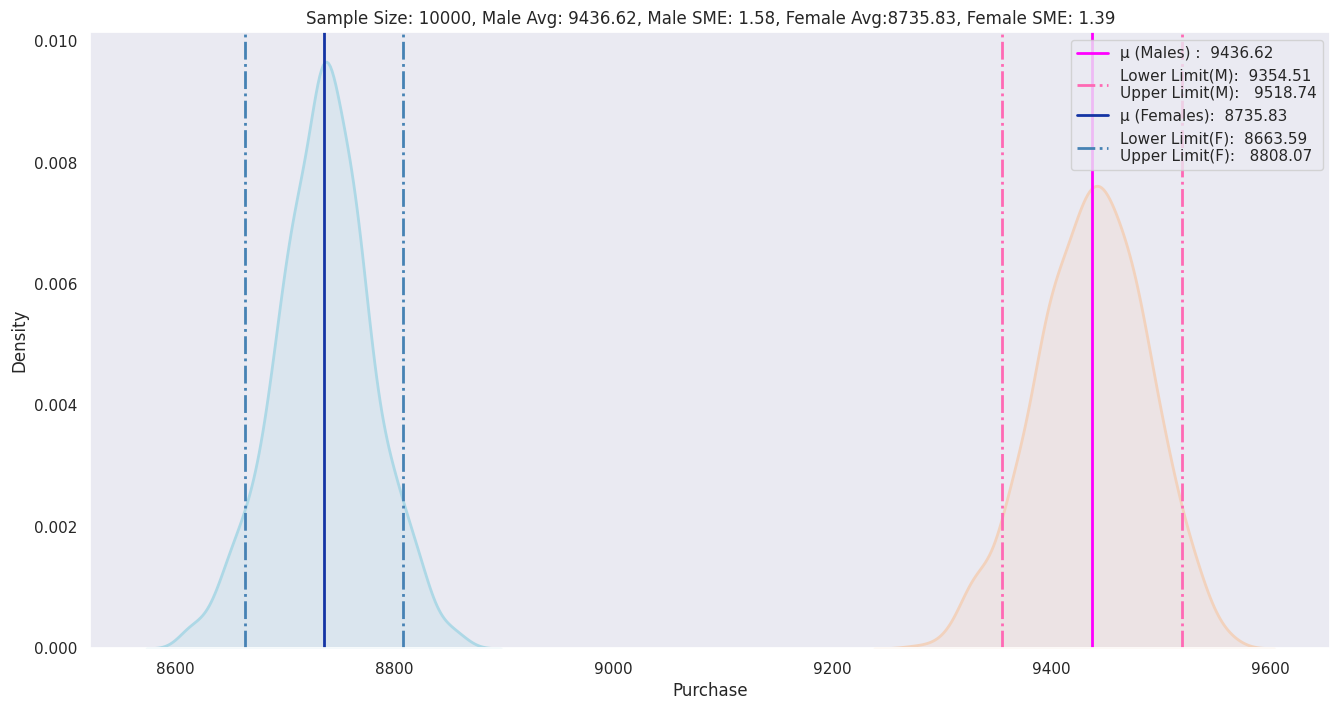

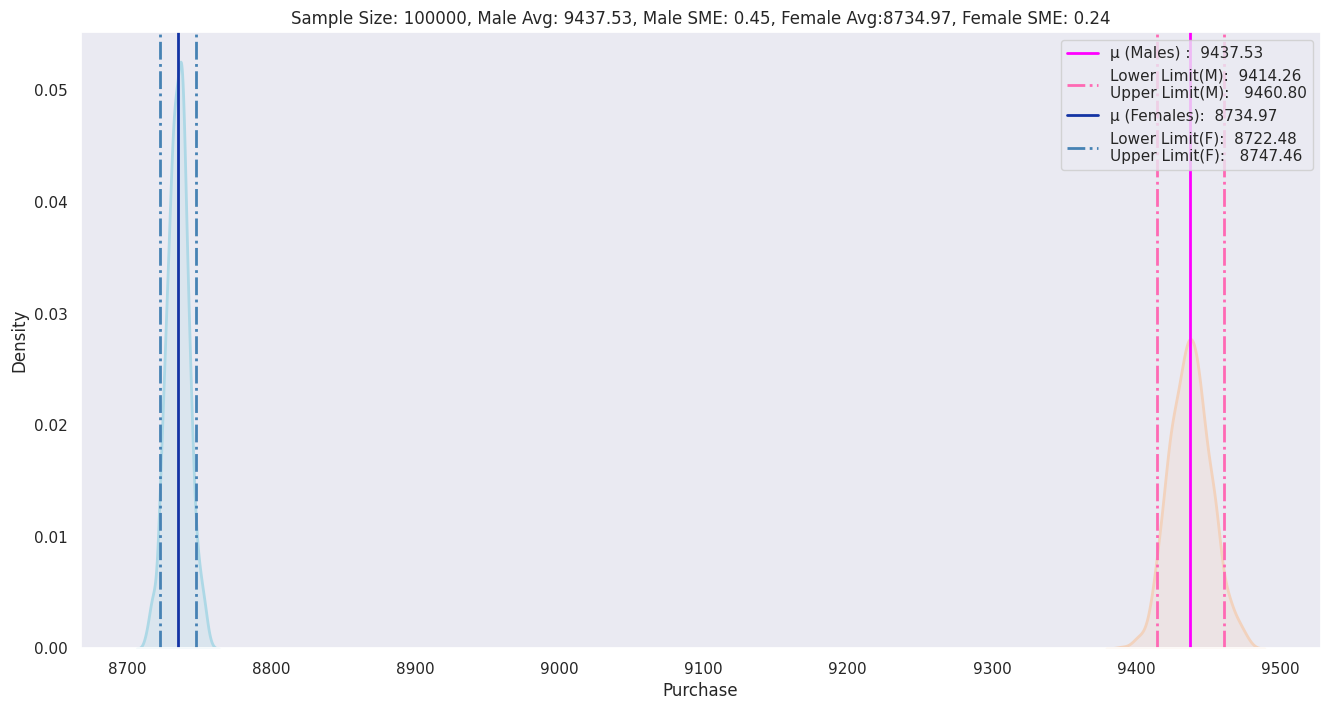

In [ ]:
sample_sizes = [10,100,1000,10000,100000]
ci = 90
itr_size = 1000

res = pd.DataFrame(columns = ['Gender','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)

    res = res.append({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    res = res.append({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}, ignore_index = True)


We can observe that as the sample size increases,

*   The average for both of them change significantly.
*   Both the plots start to seperate and become distinct.

Lets plot the mean of 1000 Random Samples of sizes 10,100,1000,10000 and 100000 with 95% Confidence Interval.


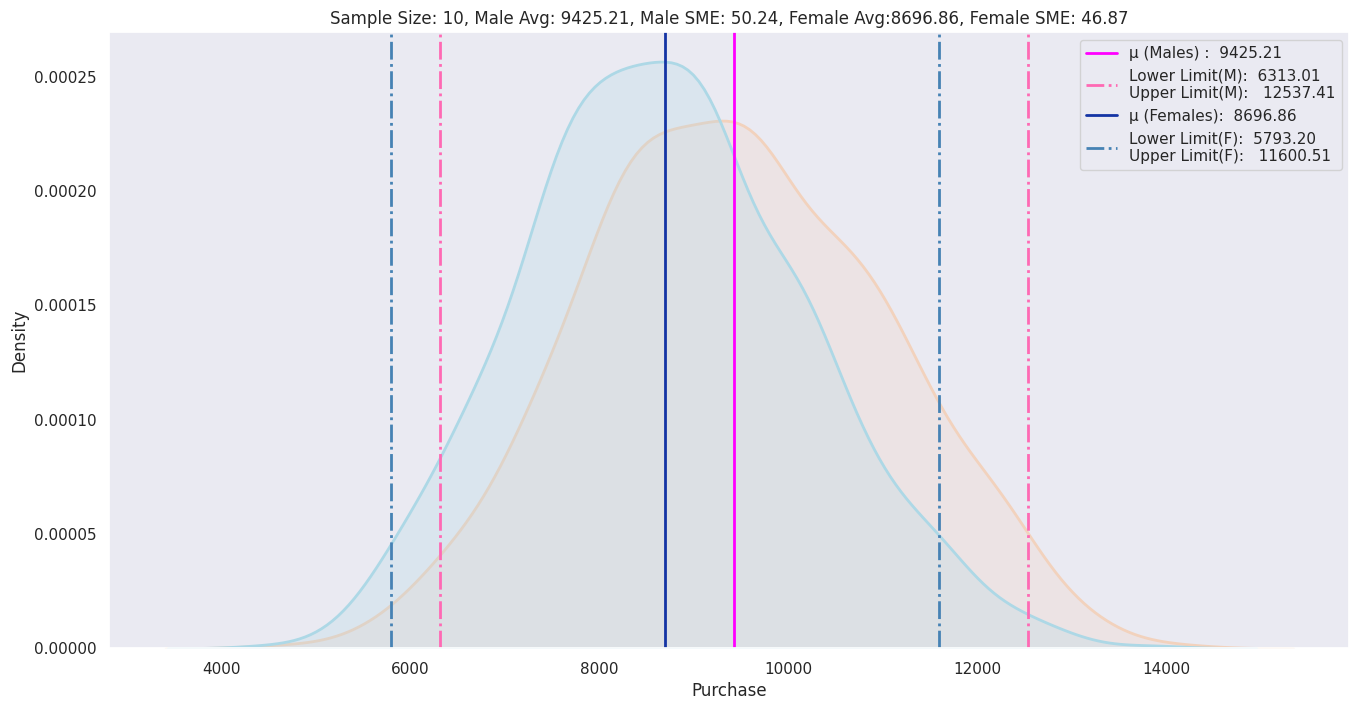

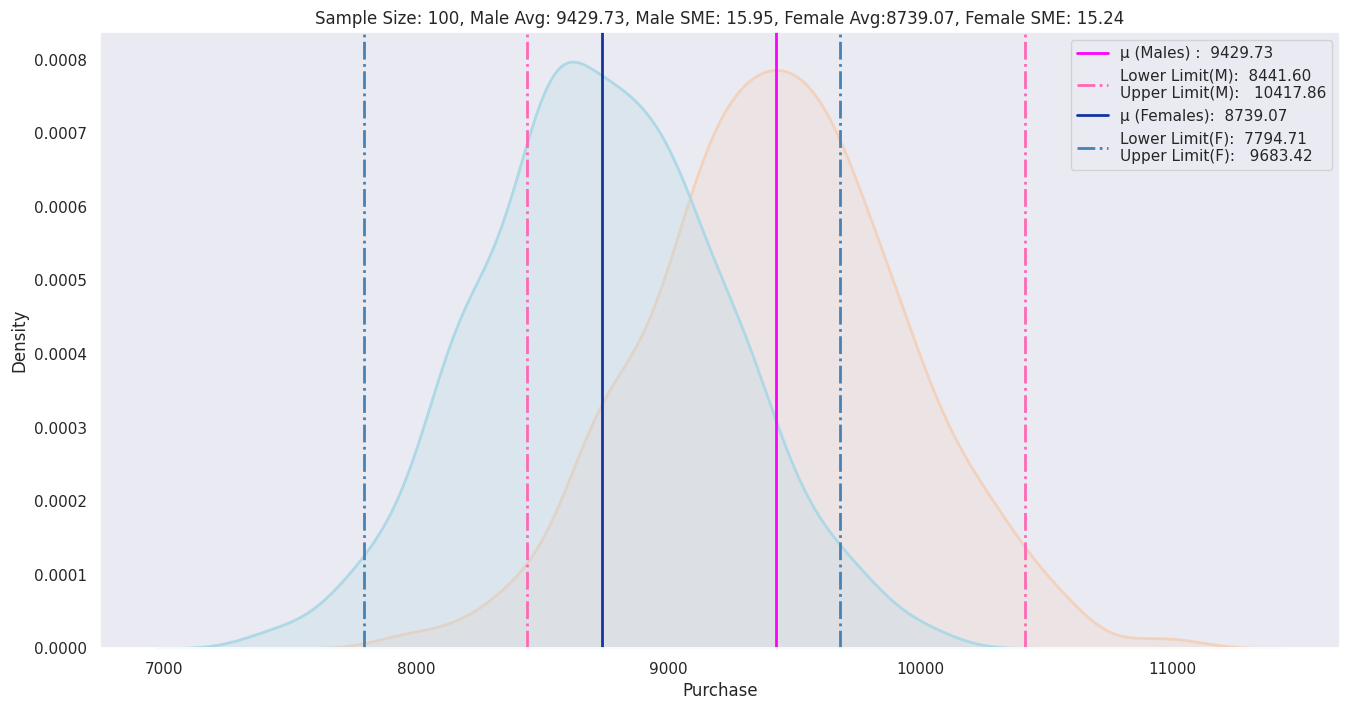

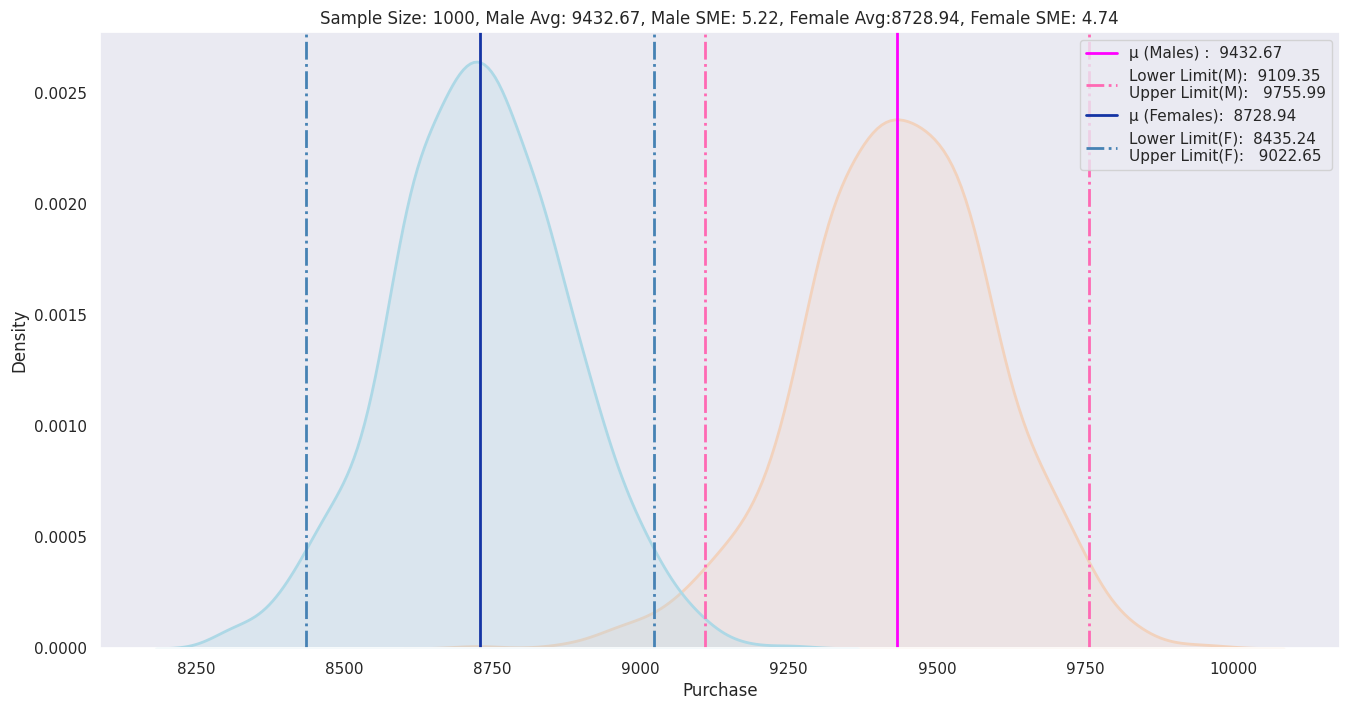

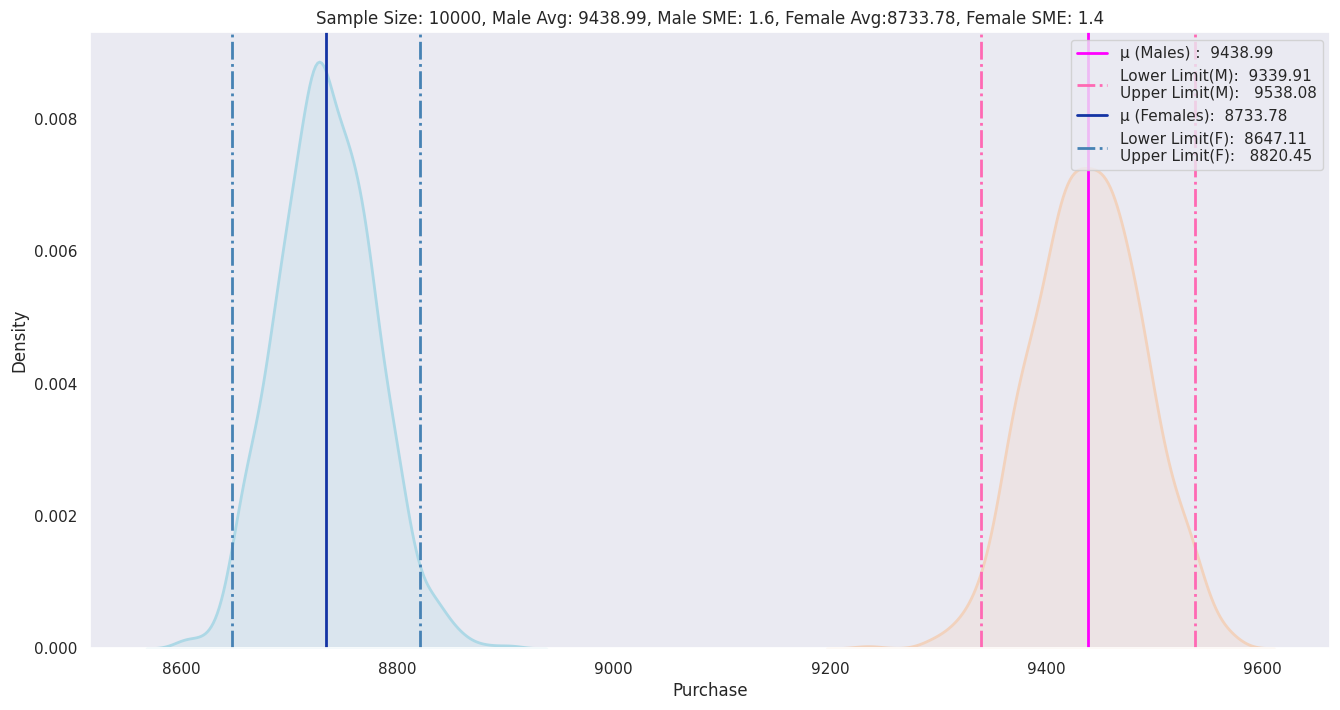

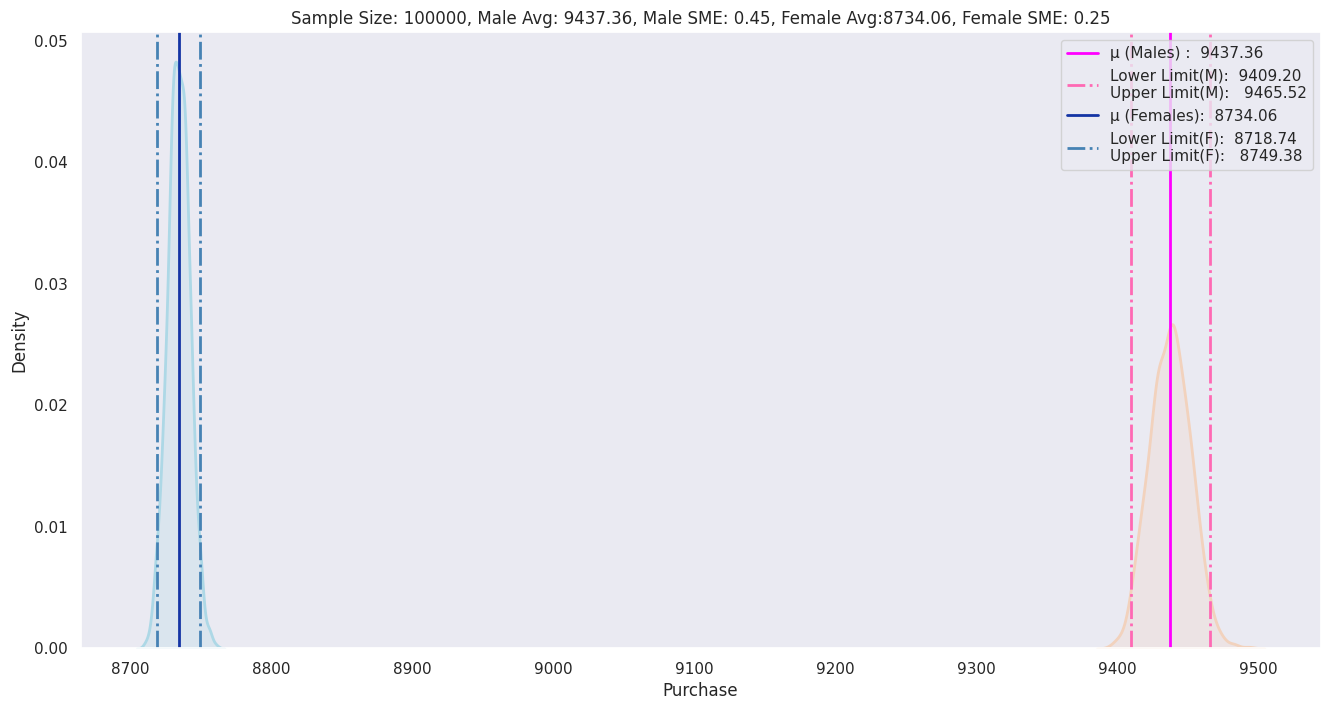

In [ ]:
sample_sizes = [10,100,1000,10000,100000]
ci = 95
itr_size = 1000

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)

    res = res.append({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    res = res.append({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}, ignore_index = True)


In [ ]:
res

Gender Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0       M          10      6778.57     12007.71      9393.14   
1       F          10      6181.31     11299.55      8740.43   
2       M         100      8611.45     10257.18      9434.31   
3       F         100      7971.78      9487.74      8729.76   
4       M        1000      9164.15      9700.64      9432.40   
5       F        1000      8484.47      8990.32      8737.39   
6       M       10000      9354.51      9518.74      9436.62   
7       F       10000      8663.59      8808.07      8735.83   
8       M      100000      9414.26      9460.80      9437.53   
9       F      100000      8722.48      8747.46      8734.97   
10      M          10      6313.01     12537.41      9425.21   
11      F          10      5793.20     11600.51      8696.86   
12      M         100      8441.60     10417.86      9429.73   
13      F         100      7794.71      9683.42      8739.07   
14      M        1000      9109.35      9755.99      9432.67   
15      F        1000      8435.24      9022.65      8728.94   
16      M       10000      9339.91      9538.08      9438.99   
17      F       10000      8647.11      8820.45      8733.78   
18      M      100000      9409.20      9465.52      9437.36   
19      F      100000      8718.74      8749.38      8734.06   

   Confidence Interval       Interval Range    Range  
0                   90  [6778.57, 12007.71]  5229.14  
1                   90  [6181.31, 11299.55]  5118.24  
2                   90  [8611.45, 10257.18]  1645.73  
3                   90   [7971.78, 9487.74]  1515.96  
4                   90   [9164.15, 9700.64]   536.49  
5                   90   [8484.47, 8990.32]   505.85  
6                   90   [9354.51, 9518.74]   164.23  
7                   90   [8663.59, 8808.07]   144.48  
8                   90    [9414.26, 9460.8]    46.54  
9                   90   [8722.48, 8747.46]    24.98  
10                  95  [6313.01, 12537.41]  6224.40  
11                  95   [5793.2, 11600.51]  5807.31  
12                  95   [8441.6, 10417.86]  1976.26  
13                  95   [7794.71, 9683.42]  1888.71  
14                  95   [9109.35, 9755.99]   646.64  
15                  95   [8435.24, 9022.65]   587.41  
16                  95   [9339.91, 9538.08]   198.17  
17                  95   [8647.11, 8820.45]   173.34  
18                  95    [9409.2, 9465.52]    56.32  
19                  95   [8718.74, 8749.38]    30.64

We can observe that

*  The CI with 90% confidence for sample size 10 for Males is [6653.41, 12210.87]

* The CI with 90% confidence for sample size 10 for Females is [6245.08, 11265.77]

* For Sample size 10 The confidence interval for both Male and Female is overlapping

and as the sample size increases, we can see the interval ranges seperating and then finally they both dont overalap.

* The CI with 90% confidence for sample size 100000 for Males is [9415.08, 9460.27]

* The CI with 90% confidence for sample size 100000 for Females is [8721.97, 8747.07]

* For Sample size 100000 The confidence interval for both Male and Female is now not overlapping.

We can also observe the same with 95% Confidence.

* The CI with 95% confidence for sample size 10 for Males is [6335.11, 12484.27]

* The CI with 95% confidence for sample size 10 for Females is [5728.62, 11778.12]

* For Sample size 10 The confidence interval for both Male and Female is overlapping

and as the sample size increases, we can see the interval ranges seperating and then finally they both dont overalap.

* The CI with 95% confidence for sample size 100000 for Males is [9410.99, 9465.95]

* The CI with 95% confidence for sample size 100000 for Females is [8719.59, 8750.12]

* For Sample size 100000 The confidence interval for both Male and Female is now not overlapping.


# **Married Vs Unmarried Purchase Values**

In [ ]:
def bootstrap_m_vs_um(sample1,sample2,sample_size,itr_size=1000,ci=90):
    ci = ci/100

    plt.figure(figsize=(16,8))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # For Sample1's means
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    # For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2

    sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

    sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)

    plt.title(f"Sample Size: {sample_size}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)}, Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')

    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)


In [ ]:
df_married = df[df['Marital_Status'] == 'Married']
df_unmarried = df[df['Marital_Status'] == 'Unmarried']

<Figure size 1200x800 with 0 Axes>

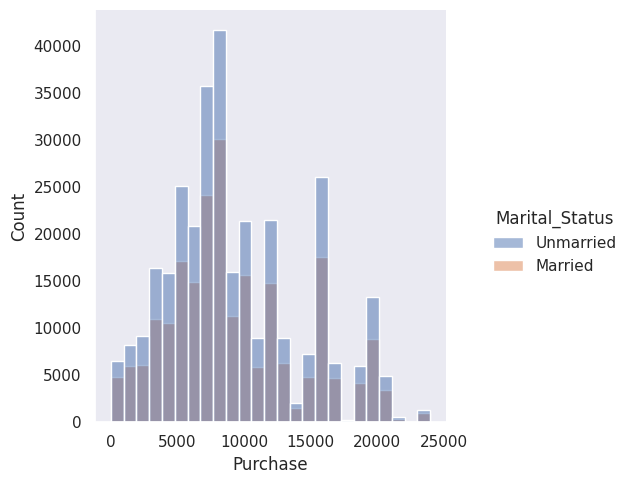

In [ ]:
plt.figure(figsize = (12,8))
sns.displot(data = df, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()

In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
Unmarried       324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
Married         225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
Unmarried       12061.0  23961.0  
Married         12042.0  23961.0

* There is no difference in the mean or median values for both of them.

Lets dive deeper using bootstrapping and verify.

Lets plot the mean of 1000 Random Samples of sizes 10,100,1000,10000 and 100000 with 90% Confidence Interval

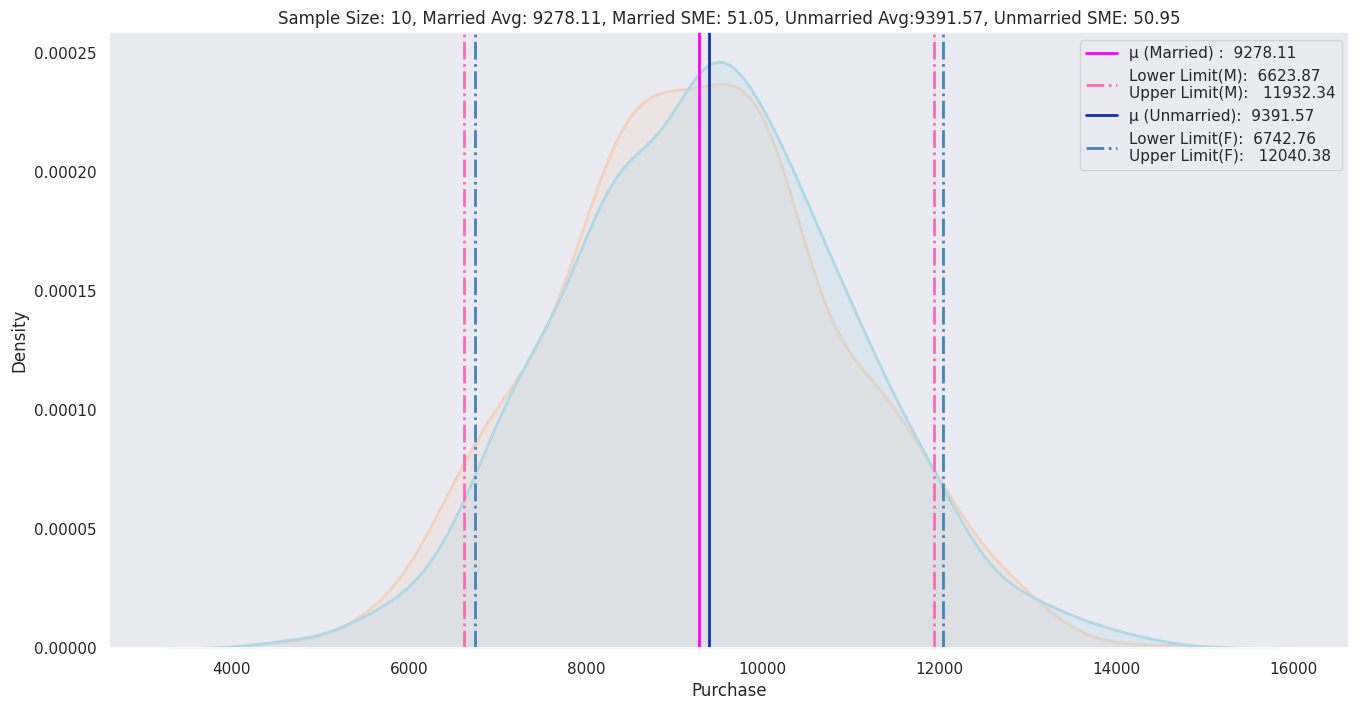

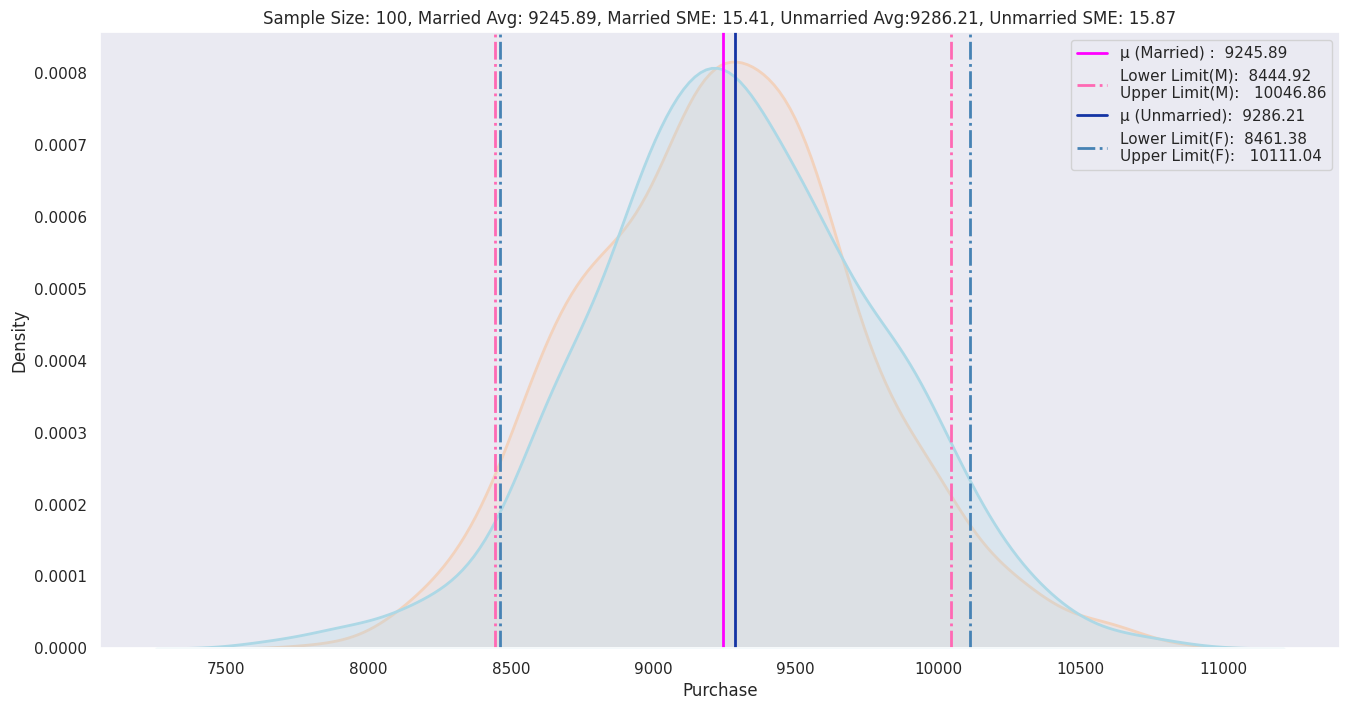

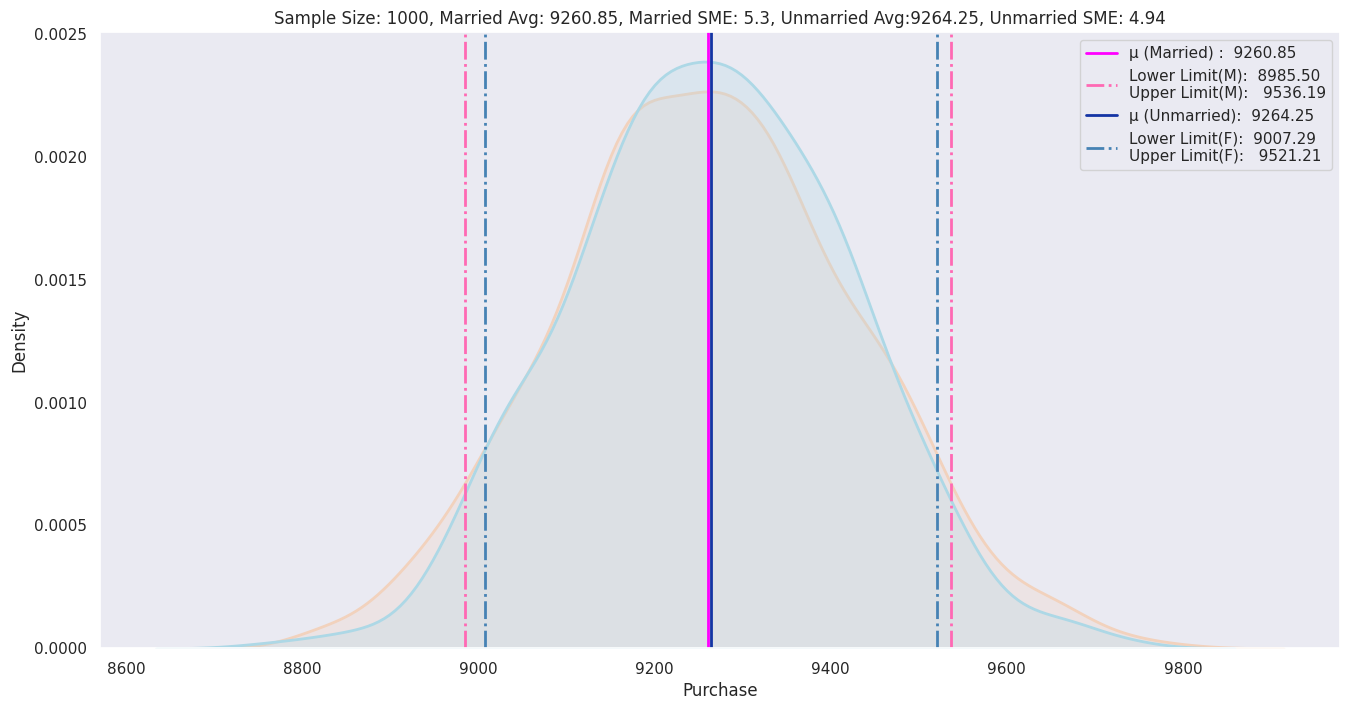

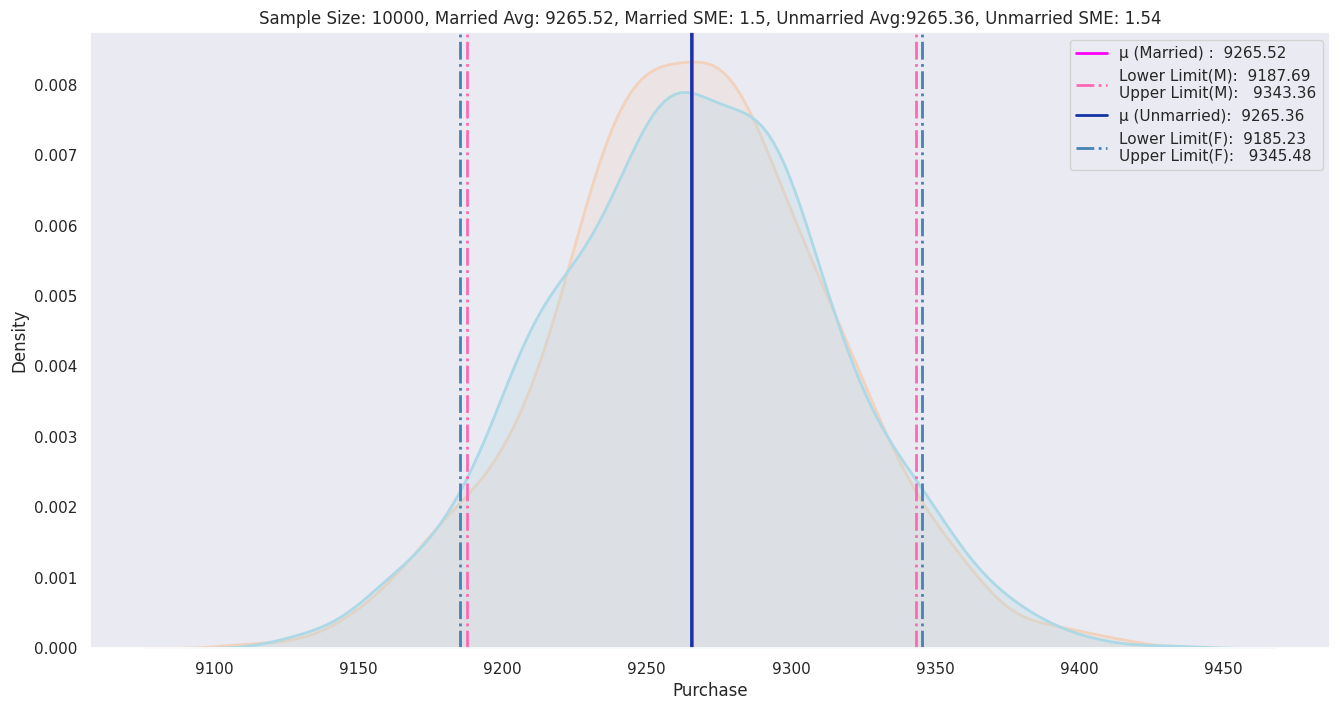

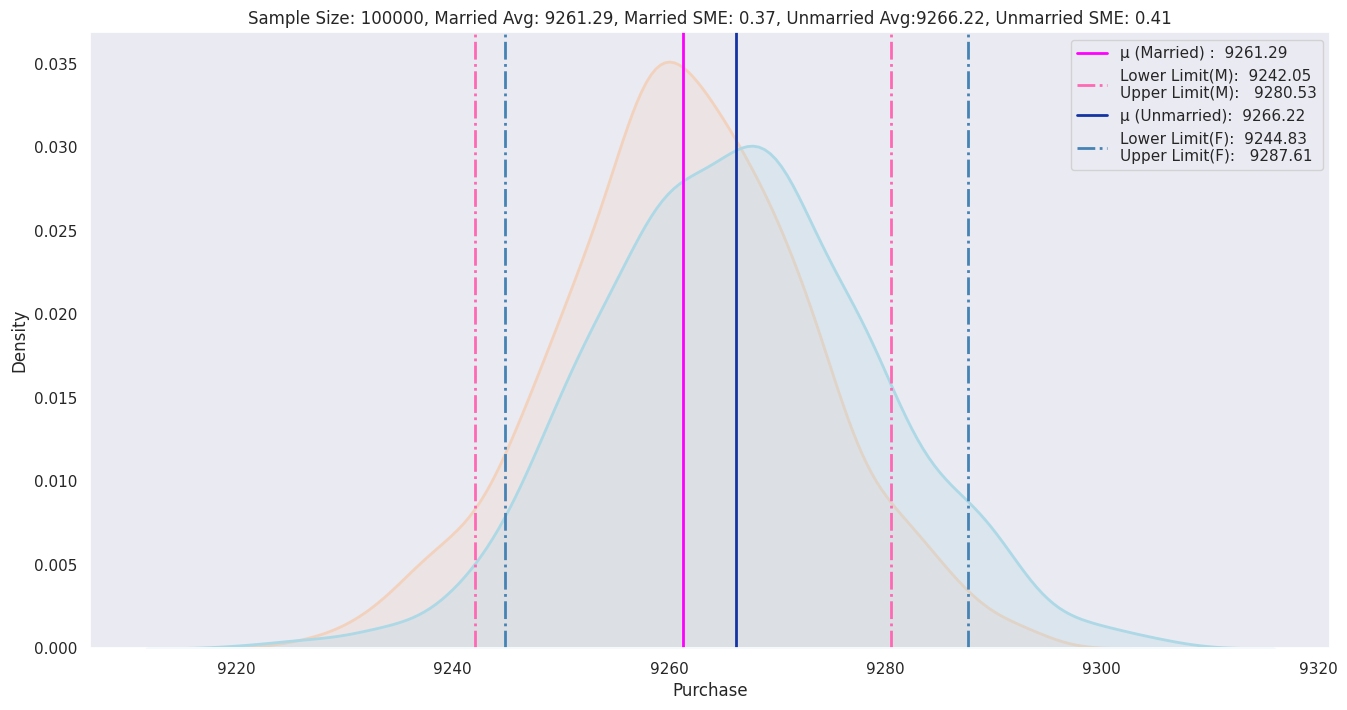

In [ ]:
sample_sizes = [10,100,1000,10000,100000]
ci = 90
itr_size = 1000

res = pd.DataFrame(columns = ['Marital_Status','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, un_avg, ll_m, ul_m, ll_un, ul_un = bootstrap_m_vs_um(df_married['Purchase'],df_unmarried['Purchase'],i,itr_size,ci)

    res = res.append({'Marital_Status':'Married','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    res = res.append({'Marital_Status':'Unmarried','Sample Size':i,'Lower Limit':ll_un,'Upper Limit':ul_un,'Sample Mean':un_avg,'Confidence Interval':ci,'Interval Range':[ll_un,ul_un],'Range': ul_un-ll_un}, ignore_index = True)

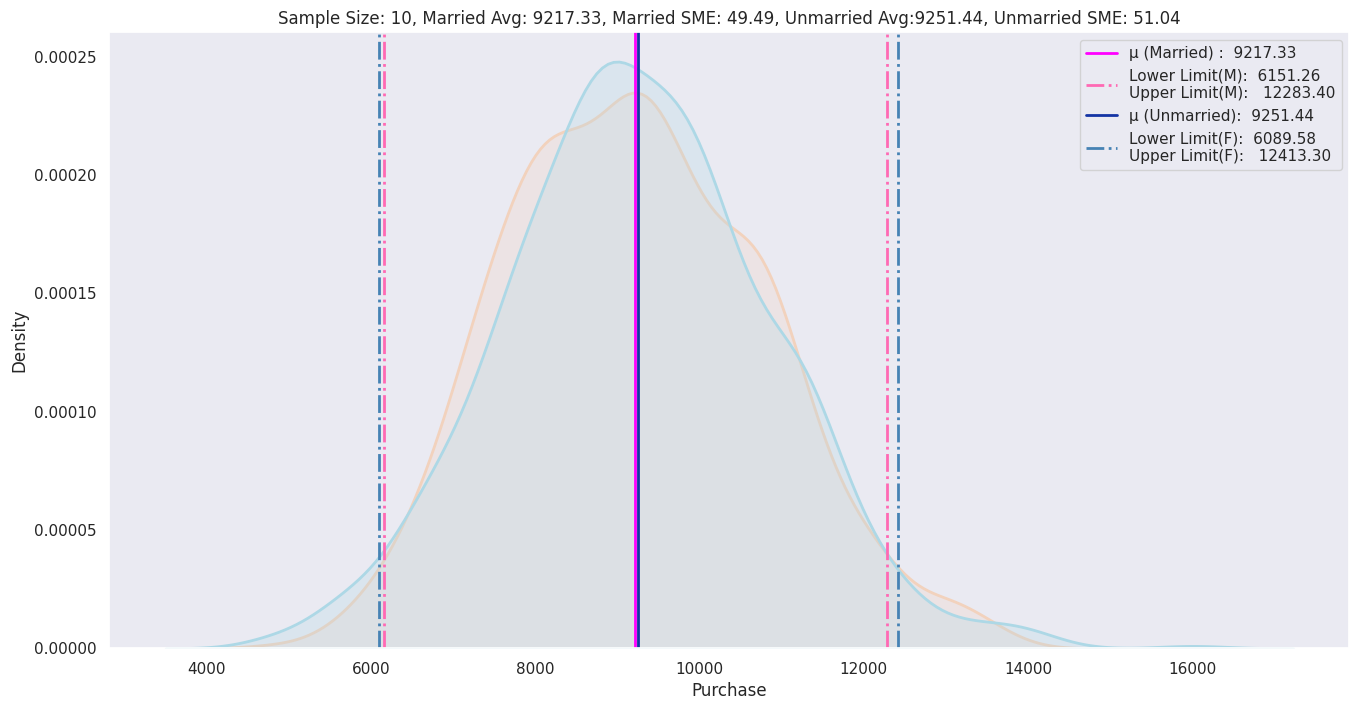

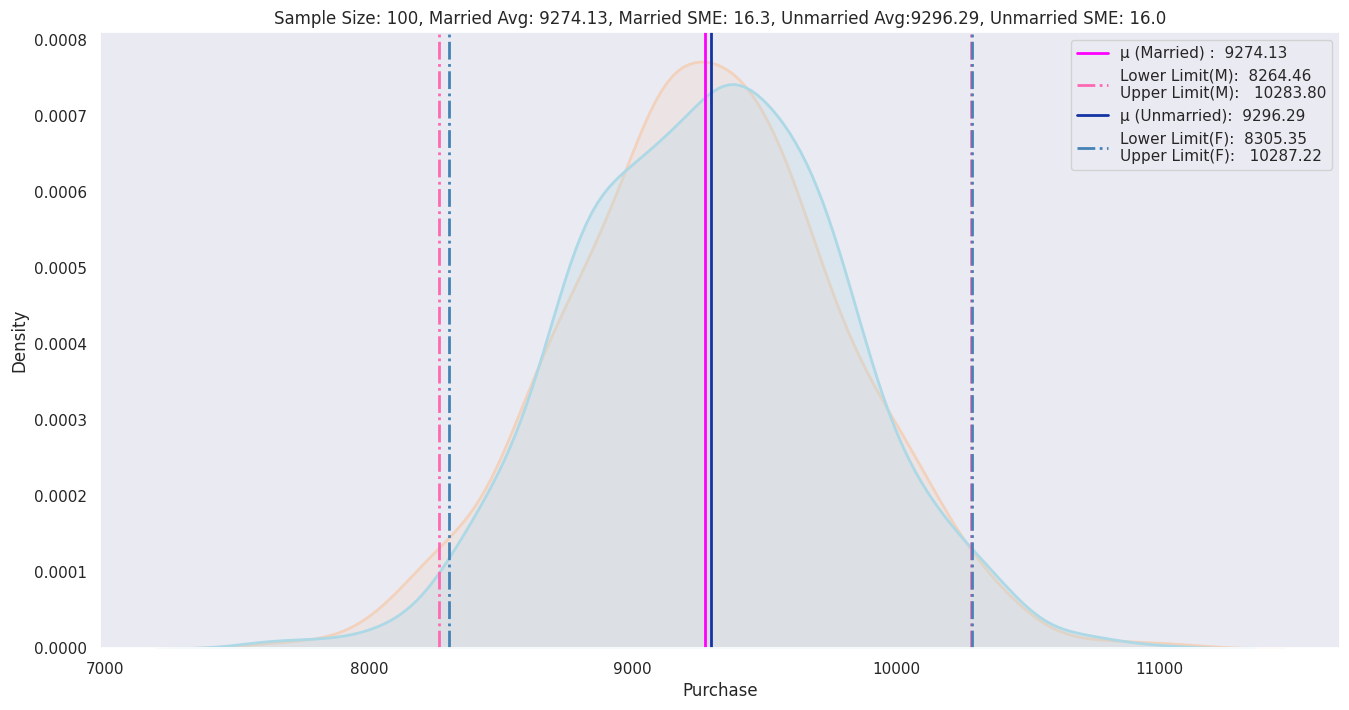

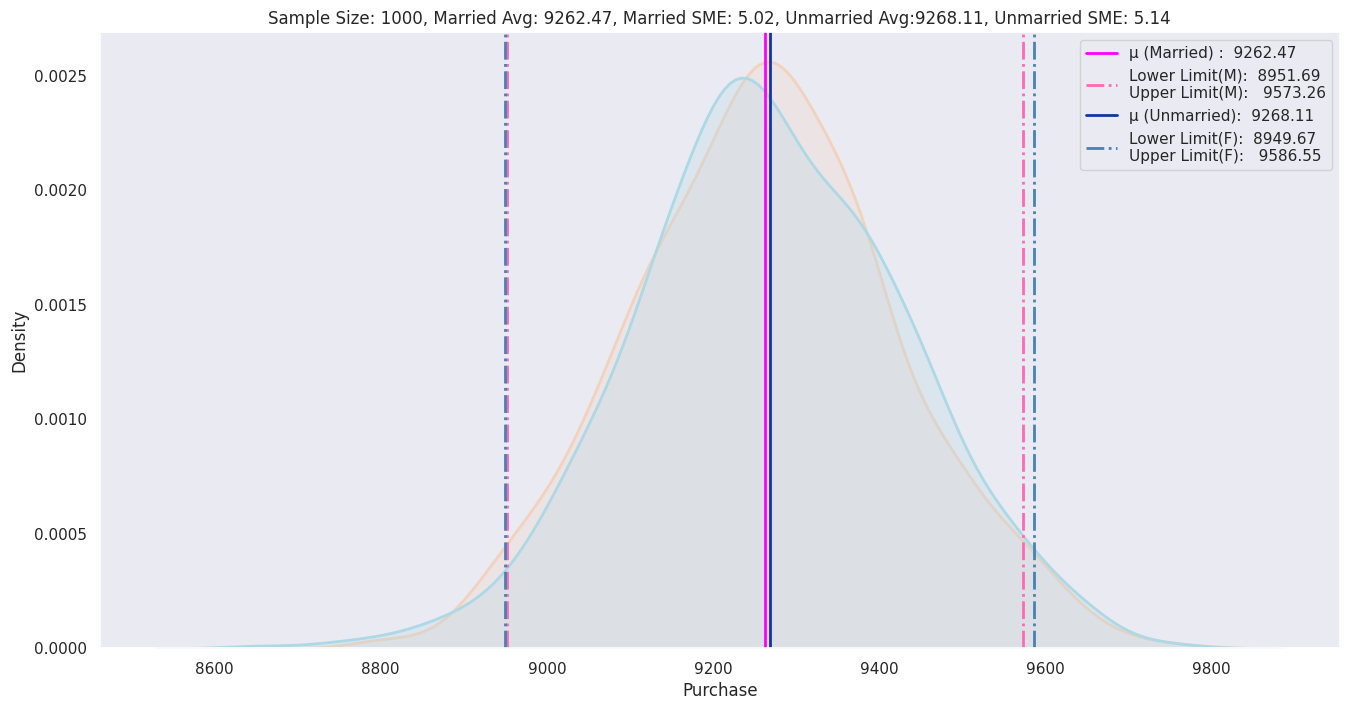

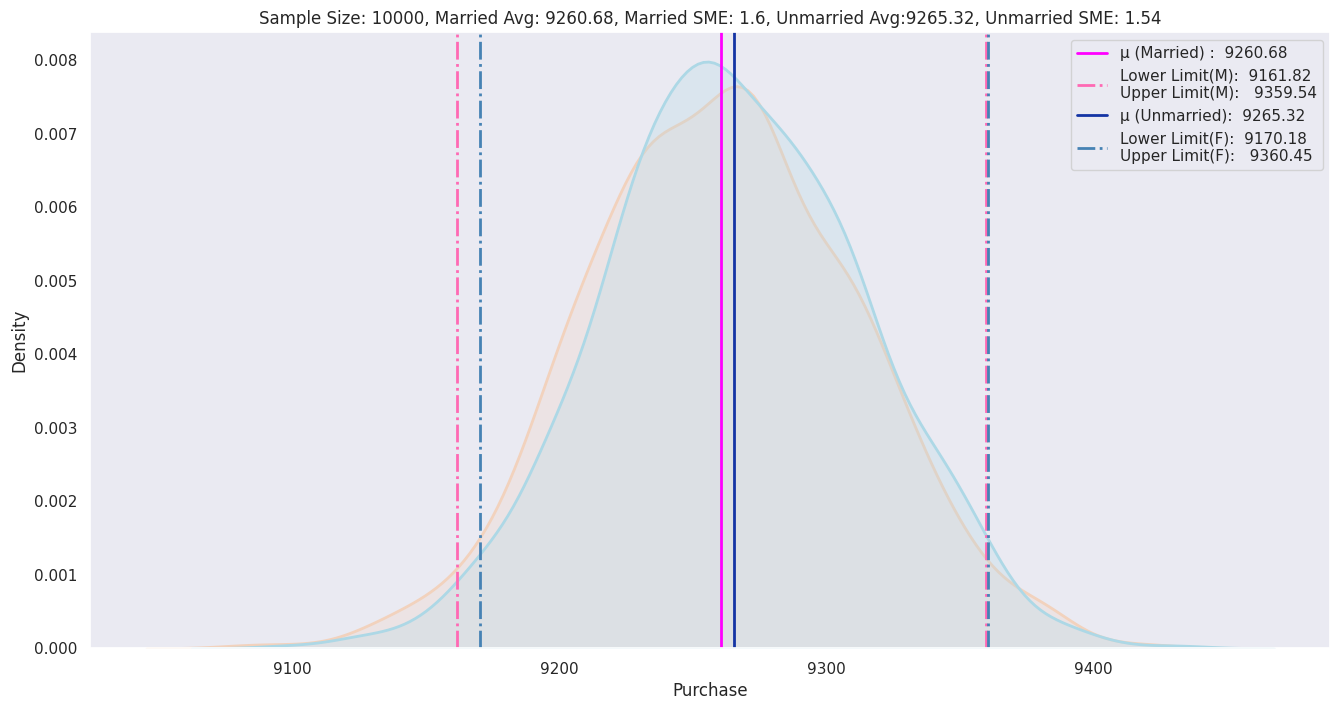

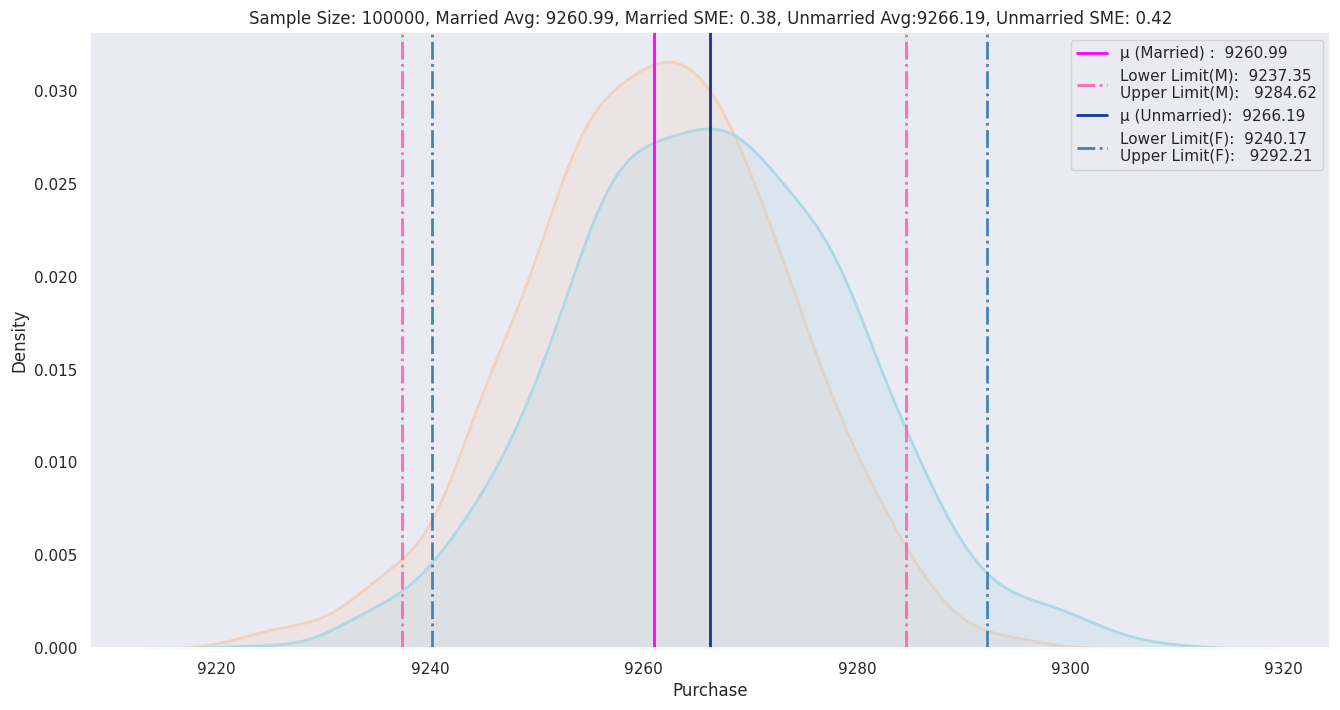

In [ ]:
sample_sizes = [10,100,1000,10000,100000]
ci = 95
itr_size = 1000

for i in sample_sizes:
    m_avg, un_avg, ll_m, ul_m, ll_un, ul_un = bootstrap_m_vs_um(df_married['Purchase'],df_unmarried['Purchase'],i,itr_size,ci)

    res = res.append({'Marital_Status':'Married','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    res = res.append({'Marital_Status':'Unmarried','Sample Size':i,'Lower Limit':ll_un,'Upper Limit':ul_un,'Sample Mean':un_avg,'Confidence Interval':ci,'Interval Range':[ll_un,ul_un],'Range': ul_un-ll_un}, ignore_index = True)

We can observe that

* There is overlapping even if we increase the sample size.

* There is no effect of their marital status on their purchases.

In [ ]:
res

Marital_Status Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0         Married          10      6623.87     11932.34      9278.11   
1       Unmarried          10      6742.76     12040.38      9391.57   
2         Married         100      8444.92     10046.86      9245.89   
3       Unmarried         100      8461.38     10111.04      9286.21   
4         Married        1000      8985.50      9536.19      9260.85   
5       Unmarried        1000      9007.29      9521.21      9264.25   
6         Married       10000      9187.69      9343.36      9265.52   
7       Unmarried       10000      9185.23      9345.48      9265.36   
8         Married      100000      9242.05      9280.53      9261.29   
9       Unmarried      100000      9244.83      9287.61      9266.22   
10        Married          10      6151.26     12283.40      9217.33   
11      Unmarried          10      6089.58     12413.30      9251.44   
12        Married         100      8264.46     10283.80      9274.13   
13      Unmarried         100      8305.35     10287.22      9296.29   
14        Married        1000      8951.69      9573.26      9262.47   
15      Unmarried        1000      8949.67      9586.55      9268.11   
16        Married       10000      9161.82      9359.54      9260.68   
17      Unmarried       10000      9170.18      9360.45      9265.32   
18        Married      100000      9237.35      9284.62      9260.99   
19      Unmarried      100000      9240.17      9292.21      9266.19   

   Confidence Interval       Interval Range    Range  
0                   90  [6623.87, 11932.34]  5308.47  
1                   90  [6742.76, 12040.38]  5297.62  
2                   90  [8444.92, 10046.86]  1601.94  
3                   90  [8461.38, 10111.04]  1649.66  
4                   90    [8985.5, 9536.19]   550.69  
5                   90   [9007.29, 9521.21]   513.92  
6                   90   [9187.69, 9343.36]   155.67  
7                   90   [9185.23, 9345.48]   160.25  
8                   90   [9242.05, 9280.53]    38.48  
9                   90   [9244.83, 9287.61]    42.78  
10                  95   [6151.26, 12283.4]  6132.14  
11                  95   [6089.58, 12413.3]  6323.72  
12                  95   [8264.46, 10283.8]  2019.34  
13                  95  [8305.35, 10287.22]  1981.87  
14                  95   [8951.69, 9573.26]   621.57  
15                  95   [8949.67, 9586.55]   636.88  
16                  95   [9161.82, 9359.54]   197.72  
17                  95   [9170.18, 9360.45]   190.27  
18                  95   [9237.35, 9284.62]    47.27  
19                  95   [9240.17, 9292.21]    52.04

For married and unmarried customers, sample size 10, confidence interval 90 we can observe that the interval range is overlapping

For married and unmarried customers, sample size 100000, confidence interval 90 we can observe that the interval range is still overlapping

This means there is no effect of marital status on purchase habits of customers

# **Age groups wise purchase habits**

In [ ]:
def bootstrap_age(sample, sample_size, itr_size=1000, ci = 90):
    ci = ci/100

    global flag

    sample_n = [np.mean(sample.sample(sample_size)) for i in range(itr_size)]

    mean  = np.mean(sample_n)
    sigma = np.std(sample_n)
    sem   = stats.sem(sample_n)

    lower_limit = norm.ppf((1-ci)/2) * sigma + mean
    upper_limit = norm.ppf(ci + (1-ci)/2) * sigma + mean

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=sample_n,color="#7A68A6",fill=True,linewidth=2)

    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))

    plt.title(f"Age Group: {age_group[flag]}, Sample Size: {sample_size}, Mean:{np.round(mean,2)}, SME:{np.round(sem,2)}",fontsize=14,family="Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'dotted', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'dotted', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    flag += 1

    return sample_n ,np.round(lower_limit,2),np.round(upper_limit,2), round(mean,2)

Lets visualise the graphs of 1000 mean values of purchase samples for sample size of 1000 for all the age groups with 90% confidence interval.

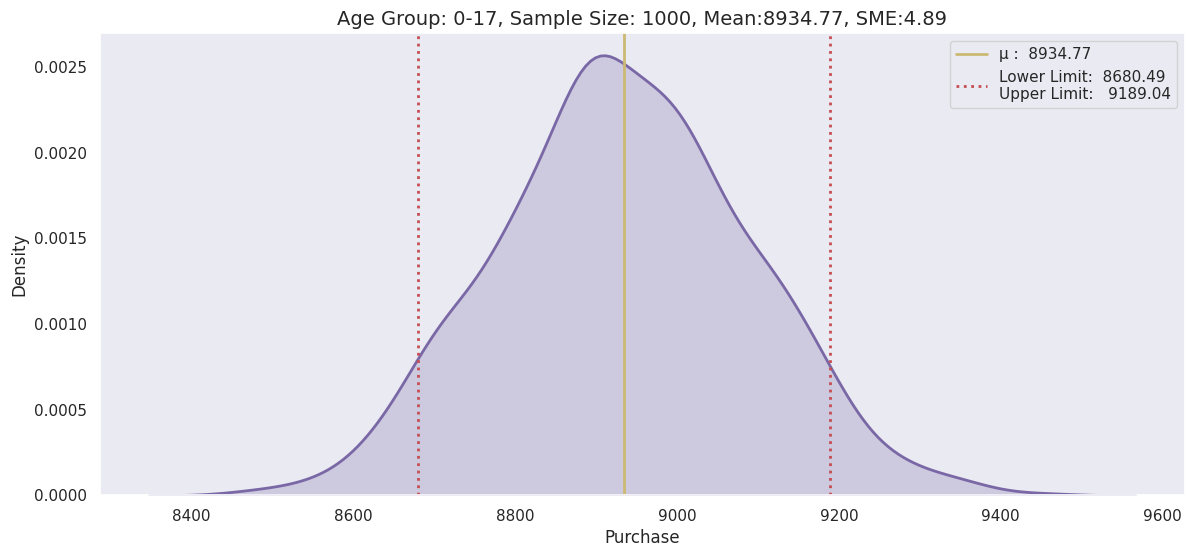

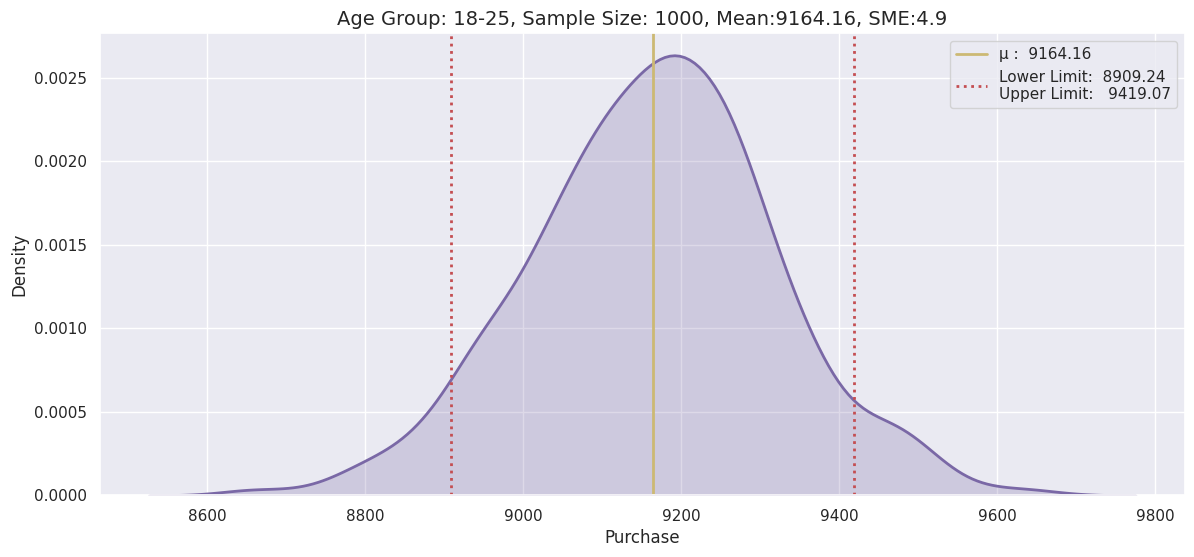

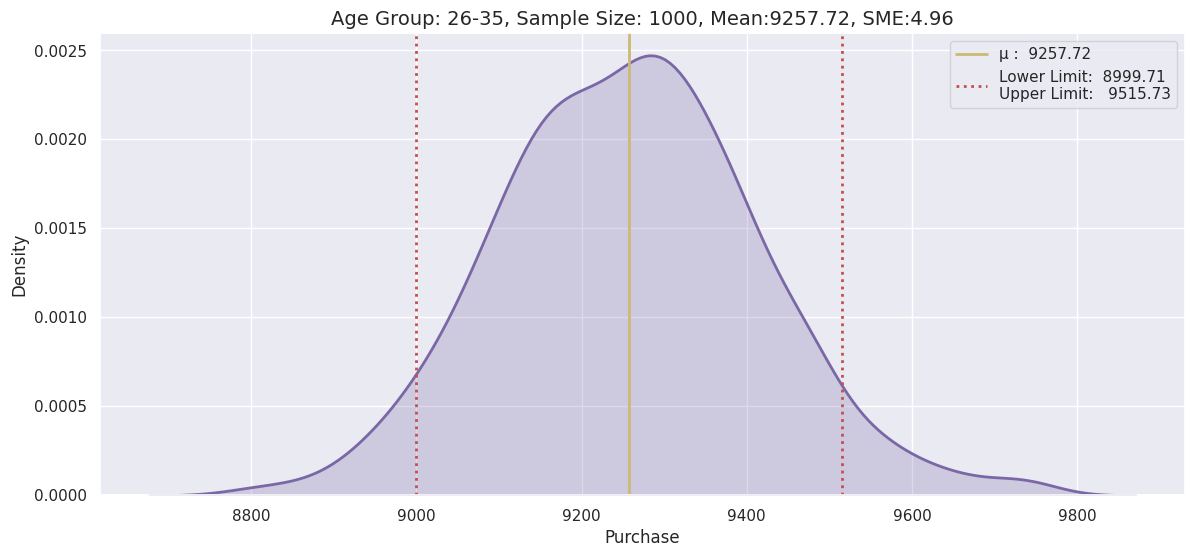

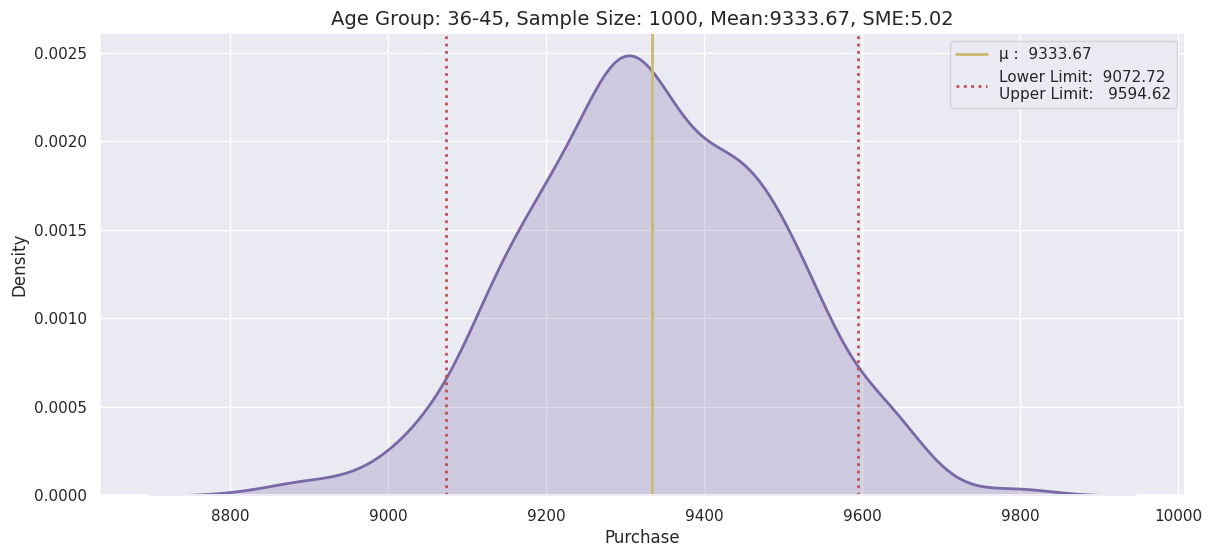

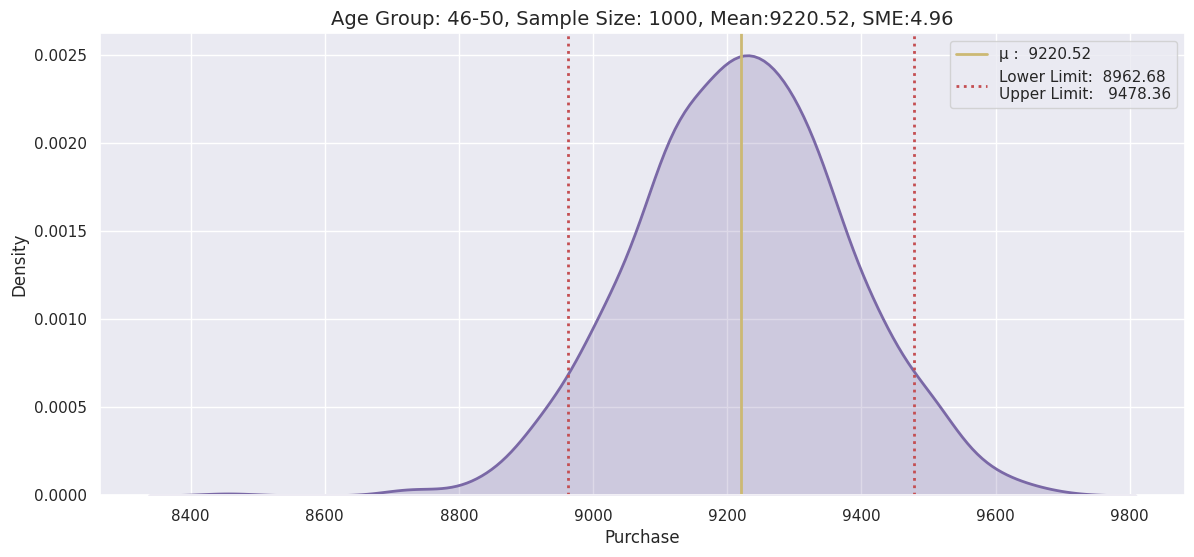

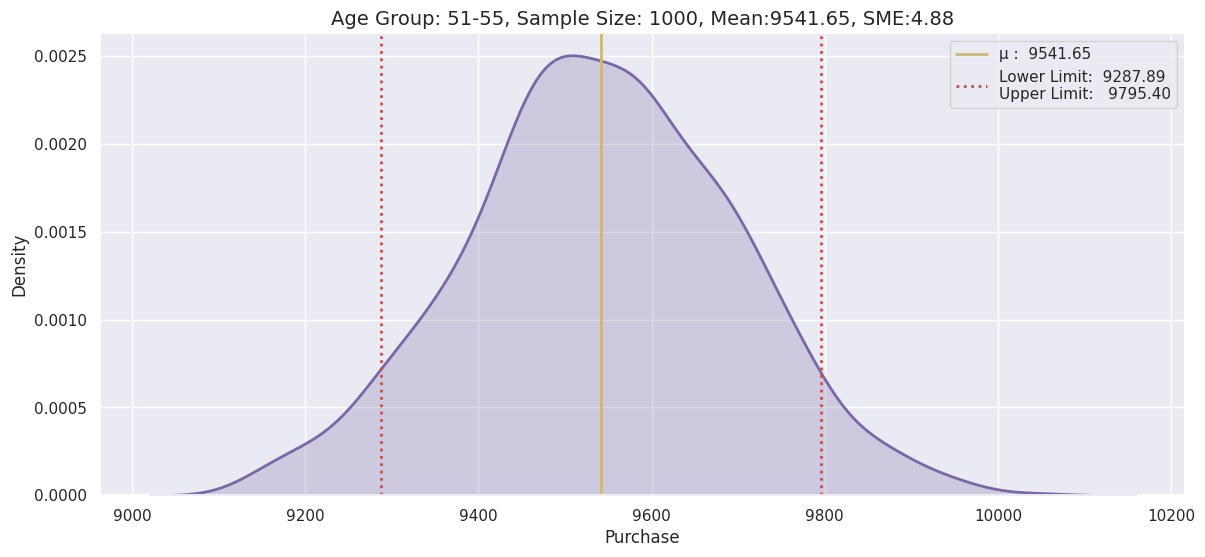

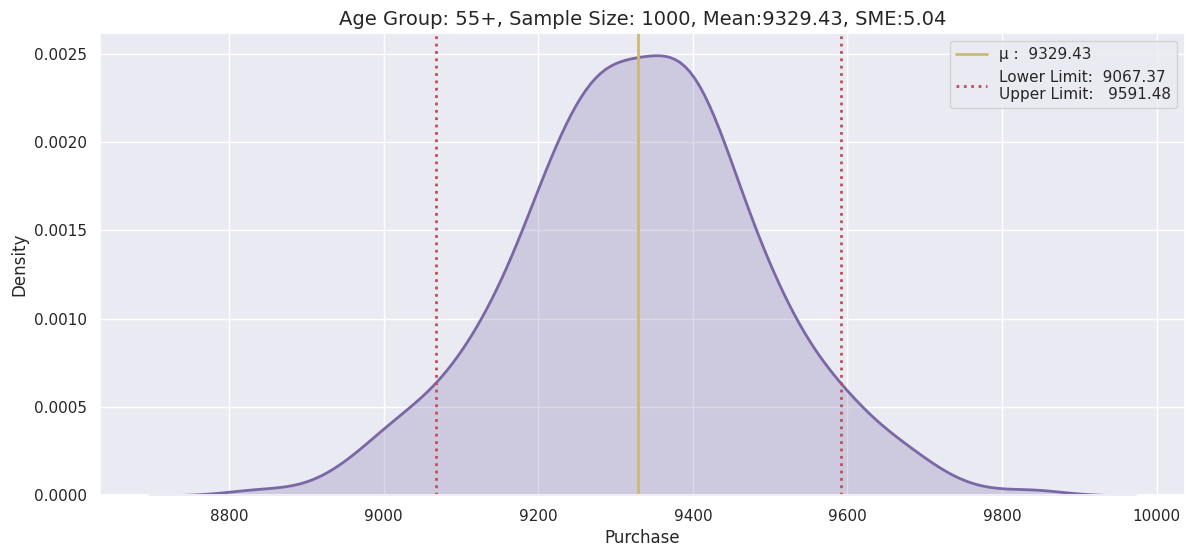

In [ ]:
ci = 90
itr_size = 1000
sample_size = 1000
flag = 0
global age_group
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

res = pd.DataFrame(columns = ['Age_Group','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in age_group:
    m_avg, ll, ul, mean = bootstrap_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)

    res = res.append({'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}, ignore_index = True)

# **95% of C.I.**

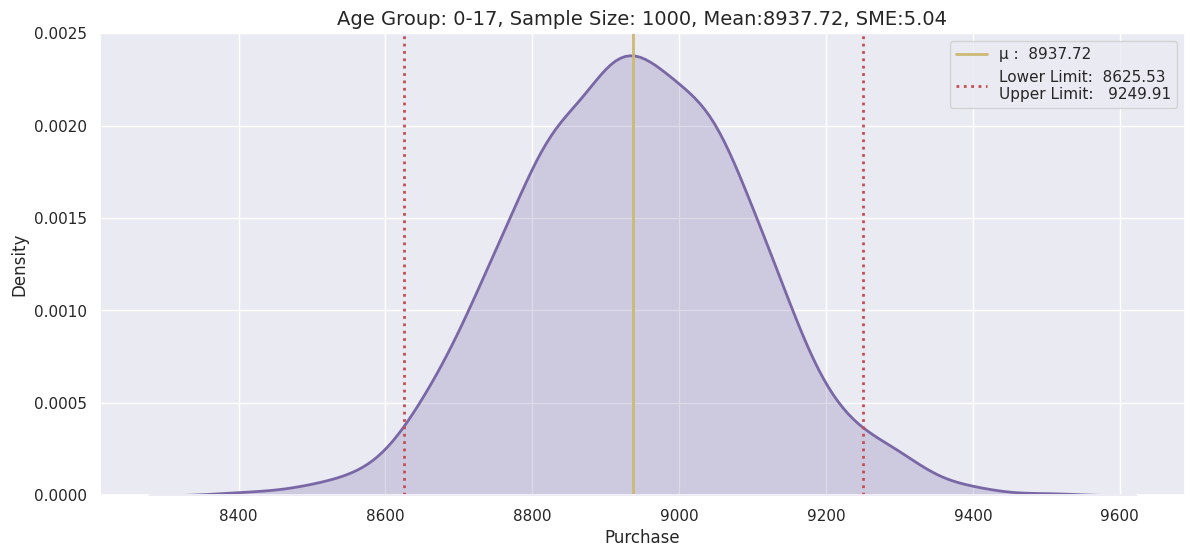

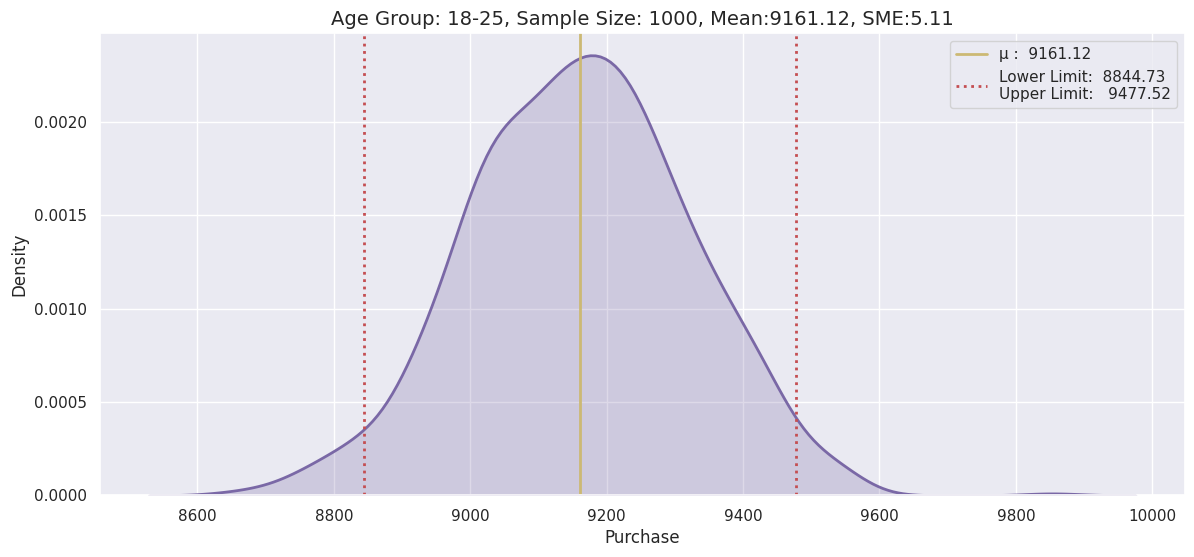

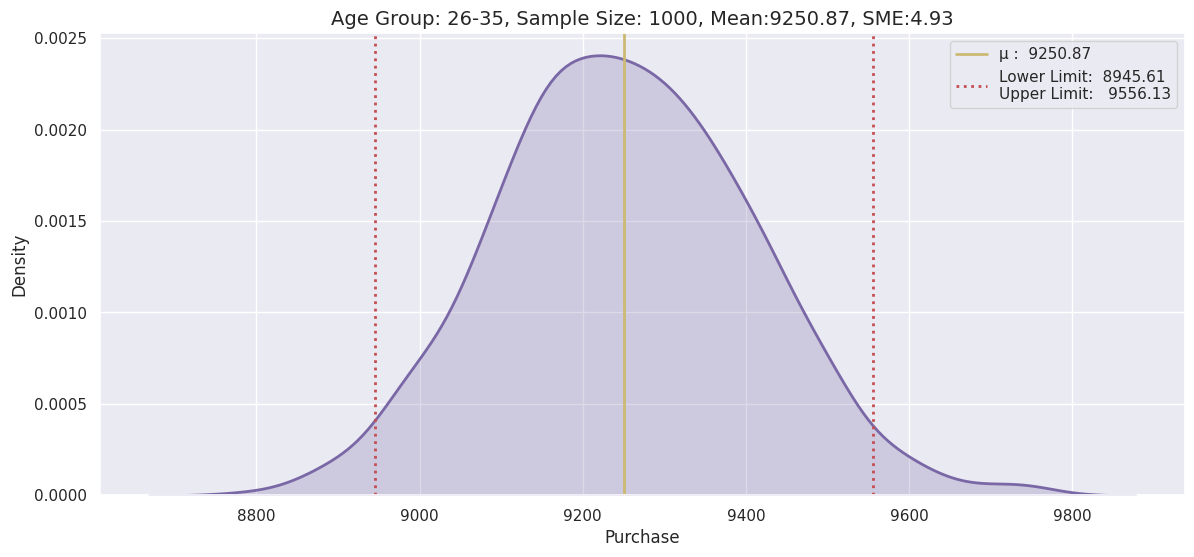

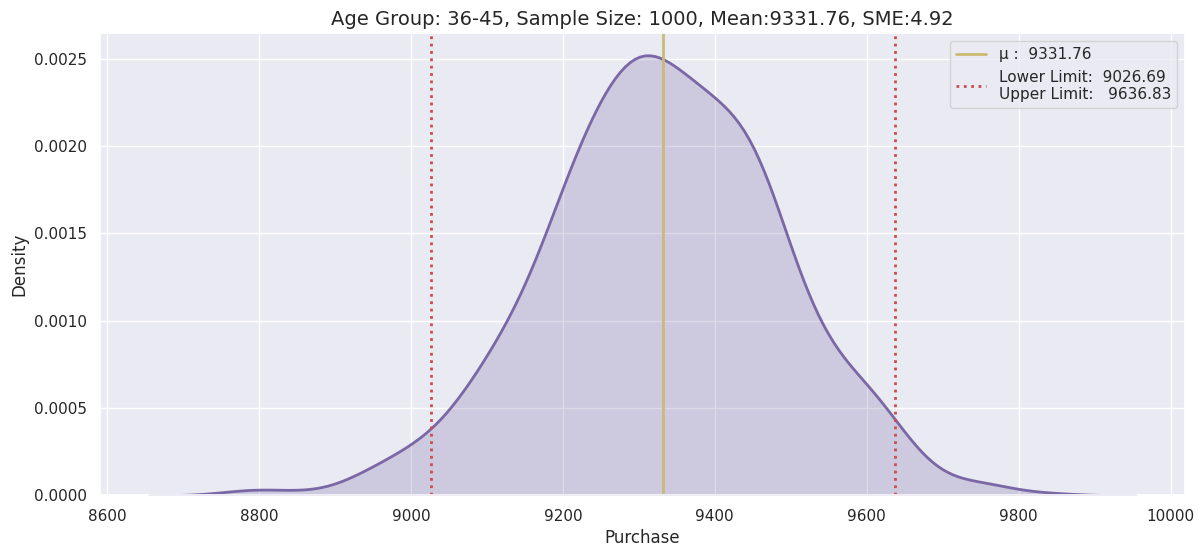

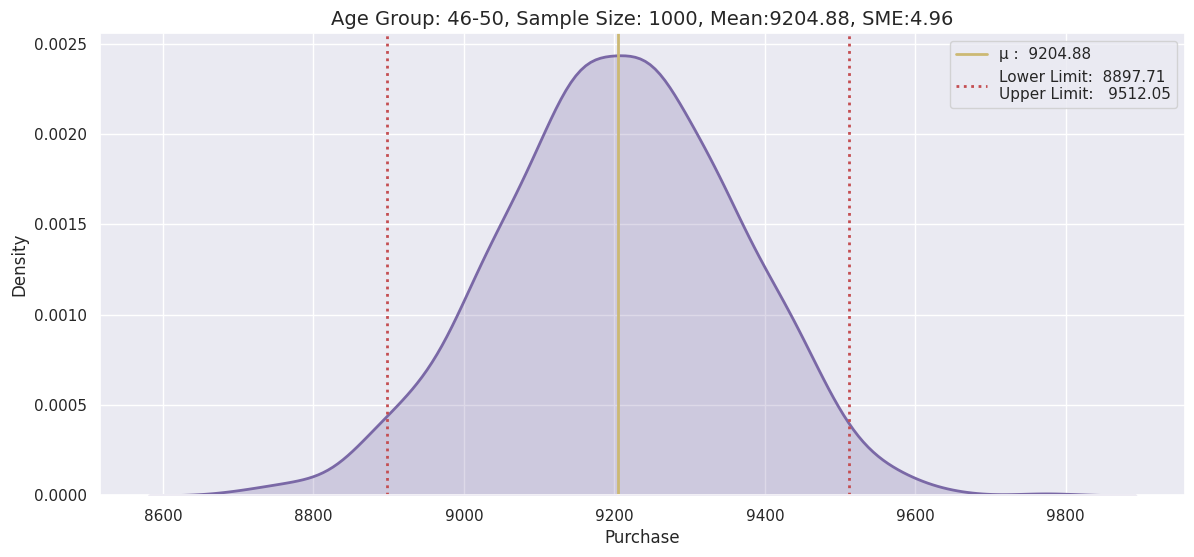

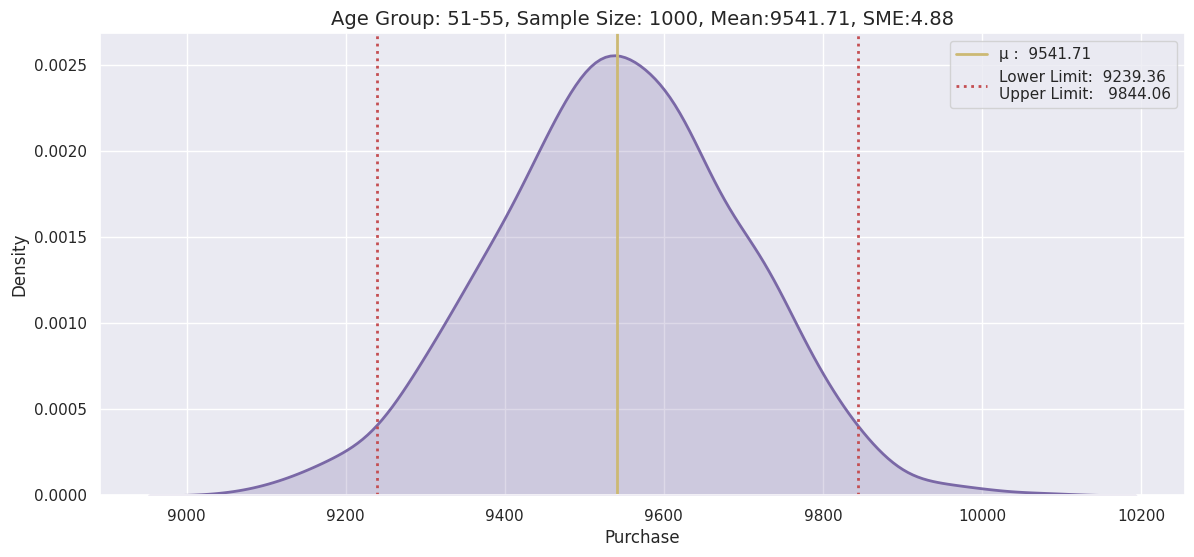

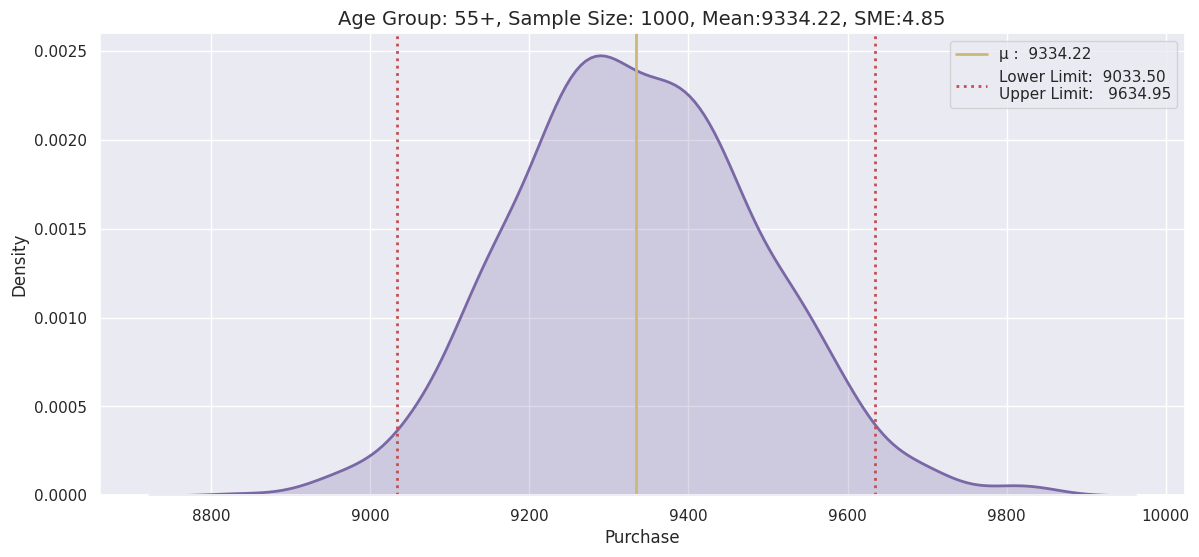

In [ ]:
ci = 95
itr_size = 1000
sample_size = 1000
flag = 0

for i in age_group:
     m_avg, ll, ul, mean = bootstrap_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)

     res = res.append({'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}, ignore_index = True)

In [ ]:
res

Age_Group Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0       0-17        1000      8680.49      9189.04      8934.77   
1      18-25        1000      8909.24      9419.07      9164.16   
2      26-35        1000      8999.71      9515.73      9257.72   
3      36-45        1000      9072.72      9594.62      9333.67   
4      46-50        1000      8962.68      9478.36      9220.52   
5      51-55        1000      9287.89      9795.40      9541.65   
6        55+        1000      9067.37      9591.48      9329.43   
7       0-17        1000      8625.53      9249.91      8937.72   
8      18-25        1000      8844.73      9477.52      9161.12   
9      26-35        1000      8945.61      9556.13      9250.87   
10     36-45        1000      9026.69      9636.83      9331.76   
11     46-50        1000      8897.71      9512.05      9204.88   
12     51-55        1000      9239.36      9844.06      9541.71   
13       55+        1000      9033.50      9634.95      9334.22   

   Confidence Interval      Interval Range   Range  
0                   90  [8680.49, 9189.04]  508.55  
1                   90  [8909.24, 9419.07]  509.83  
2                   90  [8999.71, 9515.73]  516.02  
3                   90  [9072.72, 9594.62]  521.90  
4                   90  [8962.68, 9478.36]  515.68  
5                   90   [9287.89, 9795.4]  507.51  
6                   90  [9067.37, 9591.48]  524.11  
7                   95  [8625.53, 9249.91]  624.38  
8                   95  [8844.73, 9477.52]  632.79  
9                   95  [8945.61, 9556.13]  610.52  
10                  95  [9026.69, 9636.83]  610.14  
11                  95  [8897.71, 9512.05]  614.34  
12                  95  [9239.36, 9844.06]  604.70  
13                  95   [9033.5, 9634.95]  601.45

We can observe with 90% confidence that

* Age group 0-17 has the least purchase value range of [8719.59, 8750.12].

* Age group 51-55 has highest purchase value range of [9288.27, 9802.69].

We can observe with 95% confidence that

* Age group 0-17 has the least purchase value range of [9288.27, 9802.69].

* Age group 51-55 has highest purchase value range of [9218.76, 9861.45].

All the age groups still have overlap which makes it difficult to interpret the ranges.

So now, Lets visualise the graphs of 1000 mean values of purchase samples for sample size of 1000 for all the age groups with 99% confidence interval.

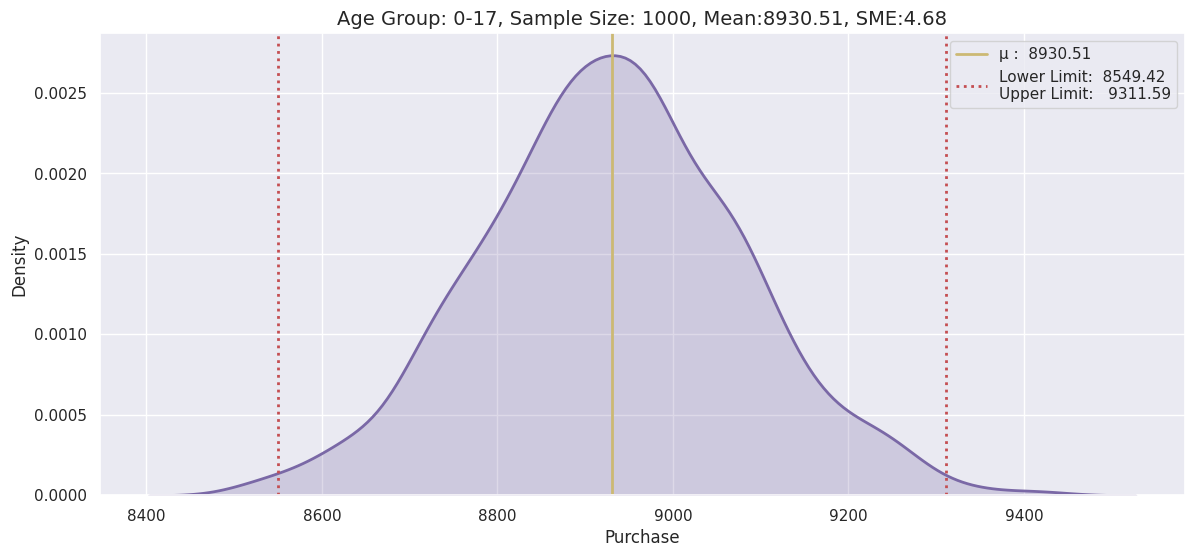

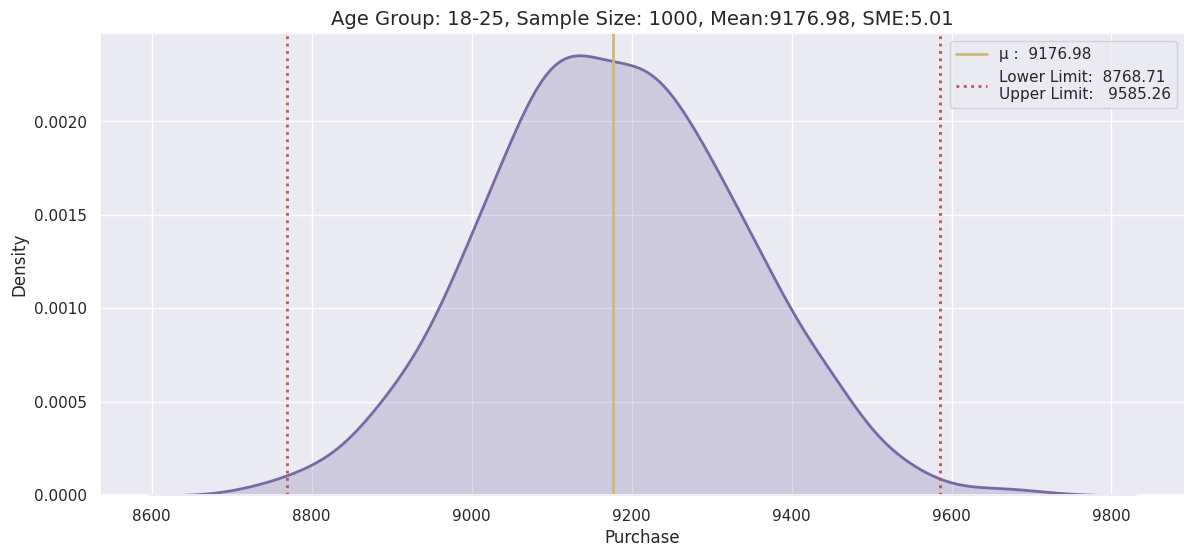

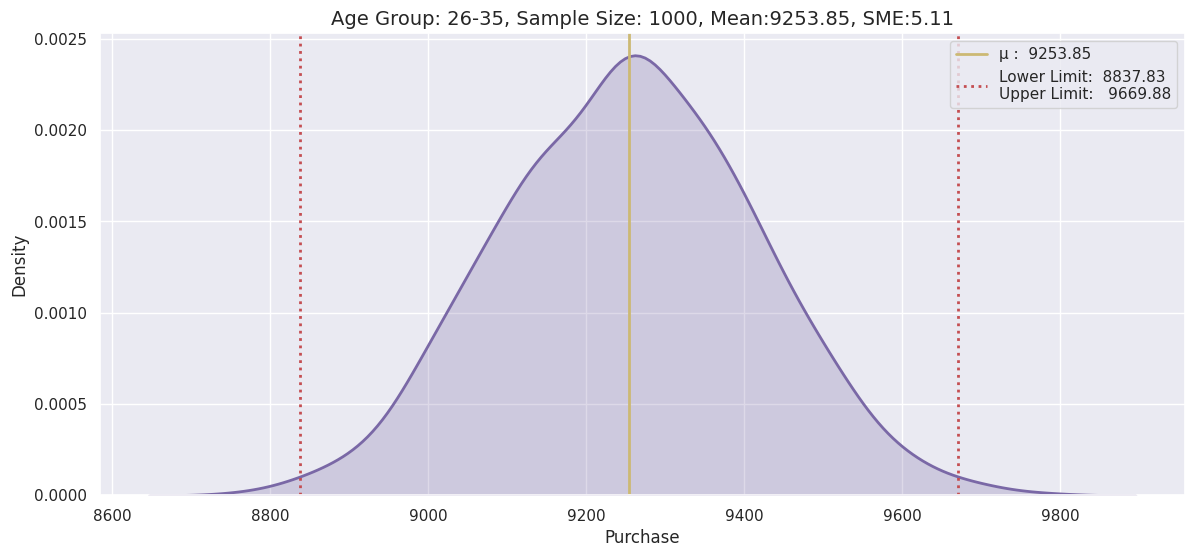

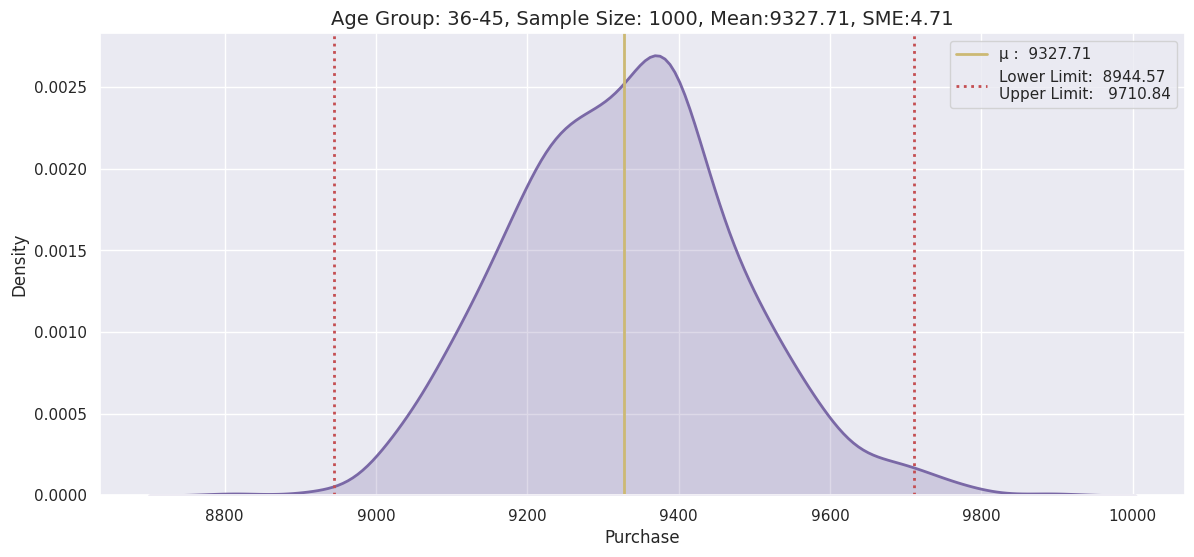

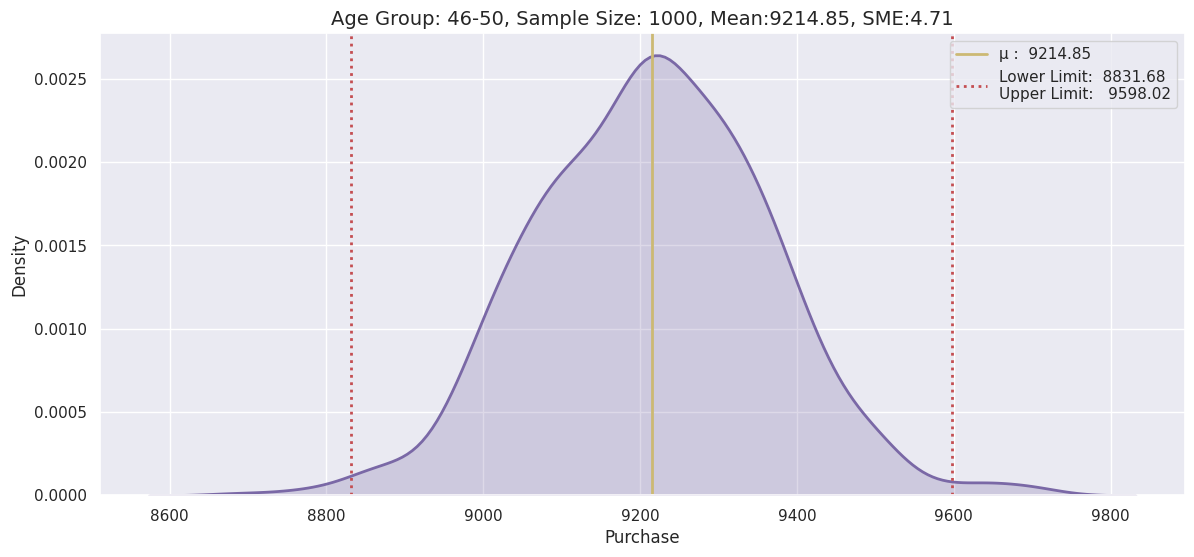

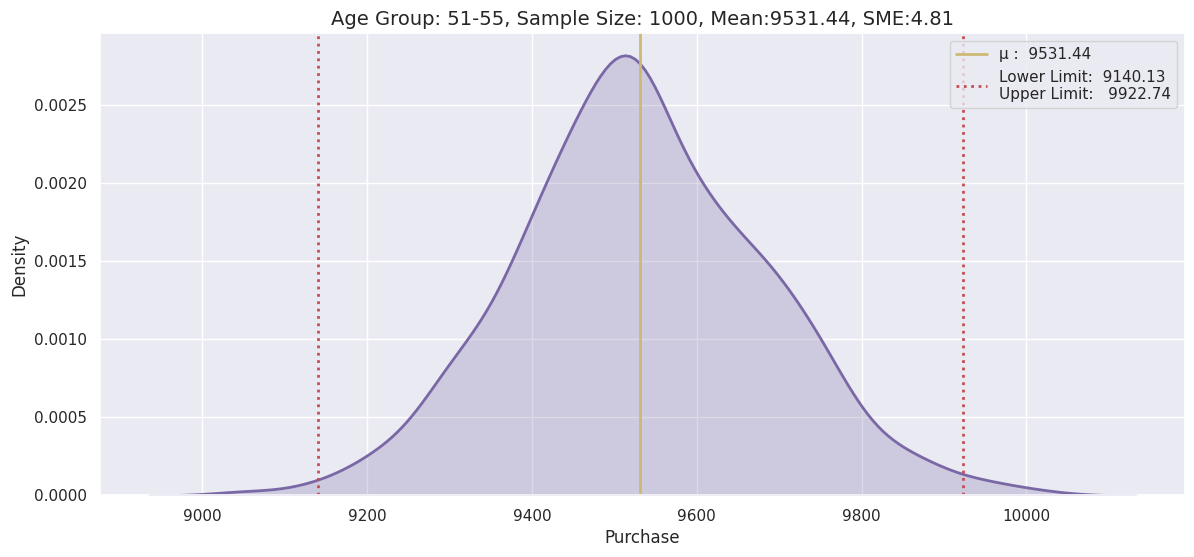

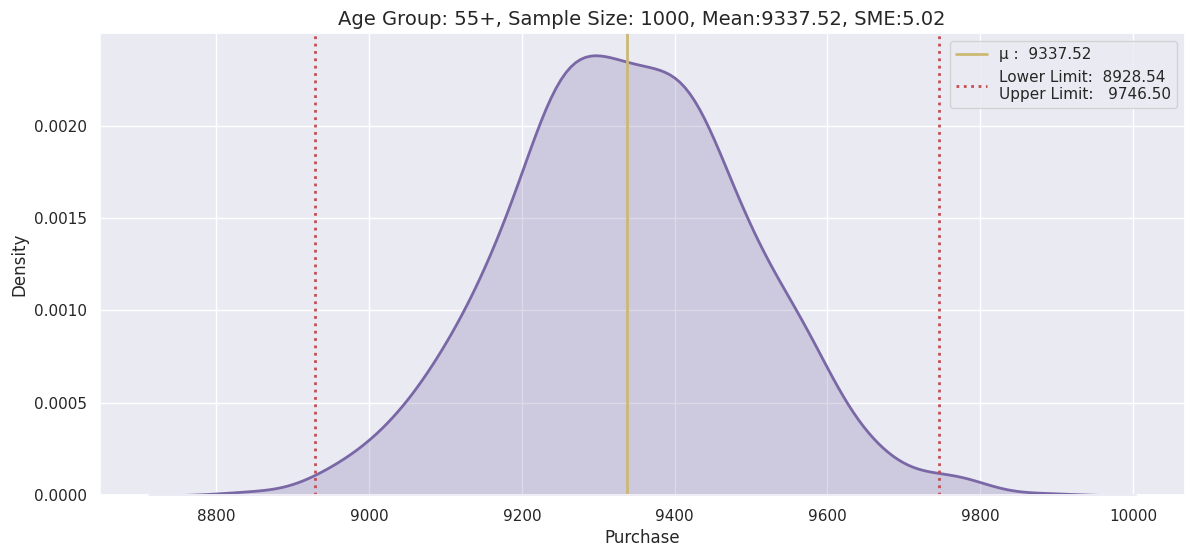

In [ ]:
ci = 99
itr_size = 1000
sample_size = 1000
flag = 0

for i in age_group:
     m_avg, ll, ul, mean = bootstrap_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)

     res = res.append({'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}, ignore_index = True)

In [ ]:
res

Age_Group Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0       0-17        1000      8680.49      9189.04      8934.77   
1      18-25        1000      8909.24      9419.07      9164.16   
2      26-35        1000      8999.71      9515.73      9257.72   
3      36-45        1000      9072.72      9594.62      9333.67   
4      46-50        1000      8962.68      9478.36      9220.52   
5      51-55        1000      9287.89      9795.40      9541.65   
6        55+        1000      9067.37      9591.48      9329.43   
7       0-17        1000      8625.53      9249.91      8937.72   
8      18-25        1000      8844.73      9477.52      9161.12   
9      26-35        1000      8945.61      9556.13      9250.87   
10     36-45        1000      9026.69      9636.83      9331.76   
11     46-50        1000      8897.71      9512.05      9204.88   
12     51-55        1000      9239.36      9844.06      9541.71   
13       55+        1000      9033.50      9634.95      9334.22   
14      0-17        1000      8532.56      9324.41      8928.49   
15     18-25        1000      8780.75      9555.83      9168.29   
16     26-35        1000      8862.24      9644.27      9253.25   
17     36-45        1000      8931.24      9743.56      9337.40   
18     46-50        1000      8826.53      9592.61      9209.57   
19     51-55        1000      9115.72      9948.69      9532.21   
20       55+        1000      8939.20      9733.93      9336.57   
21      0-17        1000      8549.42      9311.59      8930.51   
22     18-25        1000      8768.71      9585.26      9176.98   
23     26-35        1000      8837.83      9669.88      9253.85   
24     36-45        1000      8944.57      9710.84      9327.71   
25     46-50        1000      8831.68      9598.02      9214.85   
26     51-55        1000      9140.13      9922.74      9531.44   
27       55+        1000      8928.54      9746.50      9337.52   

   Confidence Interval      Interval Range   Range  
0                   90  [8680.49, 9189.04]  508.55  
1                   90  [8909.24, 9419.07]  509.83  
2                   90  [8999.71, 9515.73]  516.02  
3                   90  [9072.72, 9594.62]  521.90  
4                   90  [8962.68, 9478.36]  515.68  
5                   90   [9287.89, 9795.4]  507.51  
6                   90  [9067.37, 9591.48]  524.11  
7                   95  [8625.53, 9249.91]  624.38  
8                   95  [8844.73, 9477.52]  632.79  
9                   95  [8945.61, 9556.13]  610.52  
10                  95  [9026.69, 9636.83]  610.14  
11                  95  [8897.71, 9512.05]  614.34  
12                  95  [9239.36, 9844.06]  604.70  
13                  95   [9033.5, 9634.95]  601.45  
14                  99  [8532.56, 9324.41]  791.85  
15                  99  [8780.75, 9555.83]  775.08  
16                  99  [8862.24, 9644.27]  782.03  
17                  99  [8931.24, 9743.56]  812.32  
18                  99  [8826.53, 9592.61]  766.08  
19                  99  [9115.72, 9948.69]  832.97  
20                  99   [8939.2, 9733.93]  794.73  
21                  99  [8549.42, 9311.59]  762.17  
22                  99  [8768.71, 9585.26]  816.55  
23                  99  [8837.83, 9669.88]  832.05  
24                  99  [8944.57, 9710.84]  766.27  
25                  99  [8831.68, 9598.02]  766.34  
26                  99  [9140.13, 9922.74]  782.61  
27                  99   [8928.54, 9746.5]  817.96

We can observe with 99% confidence that

* Age group 0-17 has the least purchase value range of [8543.18, 9341.05].

* Age group 51-55 has highest purchase value range of [9134.55, 9943.98].

* We can say that age group does not have much effect on the spending of customers as their interval range is overalpping with 90%, 95% and 99% confidence intervals.

# Inferences

* 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)

* 75% of the users are Male and 25% are Female. Males clearly purchase more than females.

* 59% Single, 41% Married

* 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years

* The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.

* The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.

* Majority of Customers purchase within the 5,000 - 20,000 range.

* Most mall customers are between the ages of 26 and 35.60% of purchases are made by people between the ages of 26 and 45

* City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.Purchases are high in city category C

* Most mall customers are between the ages of 26 and 35. City category C has more customers between the ages of 18 and 45.

* In City Category C, there are slightly more female customers.

* Product 5 and 8 is common among females.

# Recommendations

* Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on * selling more of these products or selling more of the products which are purchased less.

* Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

* Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45.

* Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

* In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

* Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.

* The management should have some offers on kids (0-17 years) in order to increase sales.

* In order to attract more young shoppers, they can offer some games for the younger generation.